EDA-COPY 1 IS USED WHEN CREATINH THE PRESENTATION

In [108]:
pip install xgboost


In [47]:
pip install mca

Note: you may need to restart the kernel to use updated packages.


In [3]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection
from sklearn import metrics
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import numpy as np
from xgboost import XGBClassifier
from sklearn import metrics
import numpy as np
from tabulate import tabulate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set()
plt.style.use('ggplot')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


** PREPROCESSING FOR THE TRAINING SET **

In [4]:
#import  traain dataset
df = pd.read_csv("train.csv", encoding='ISO-8859-1')

df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [5]:
## Target Column is Result
## Supervised Machine Learning(Having Target)
## Classification Problem
## Binary Classification Problem



In [6]:
df.shape

(30691, 11)

In [7]:
## Roes=30691
## Columns=11

In [8]:
df.columns

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')

In [9]:
## All of the columns in a dataset

In [10]:
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [12]:
df

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


In [13]:
print(df.columns)
print('*'*50)
for i in df.columns :
    print(i)
    print(df[i].describe())
    print('*'*50)

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')
**************************************************
Age of the patient
count    30689.000000
mean        44.107205
std         15.981043
min          4.000000
25%         32.000000
50%         45.000000
75%         55.000000
max         90.000000
Name: Age of the patient, dtype: float64
**************************************************
Gender of the patient
count     29789
unique        2
top        Male
freq      21986
Name: Gender of the patient, dtype: object
**************************************************
Total Bilirubin
count    30043.000000
mean         3.370319
std          6.255522
min          0.400000
25%          0.800000
50%          1.000000
75% 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [15]:
df.columns = ['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Liver_disease']
## RENAMED RESULT AS Liver_disease
# Renaming Done
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Liver_disease
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [16]:
#finding count of missing values in each column
df.isna().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
Alkphos Alkaline Phosphotase            796
Sgpt Alamine Aminotransferase           538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
ALB Albumin                             494
A/G Ratio Albumin and Globulin Ratio    559
Liver_disease                             0
dtype: int64

In [17]:
### cHECKING WHETHER THERE IS STILL ISSING VALUES 
#dropping null values - does not affect data
df = df.dropna()
df.isna().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
Alkphos Alkaline Phosphotase            0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    0
Liver_disease                           0
dtype: int64

In [18]:
## tHERE IF NO MISSING VALUES

In [19]:
df

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Liver_disease
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


In [20]:
### liver decease
# 1 = 1 Liver Patient, 
# 2 =2 Mon Liver Patient

In [21]:
#unique values in Liver_disease variable
values_in_Liver_disease = df["Liver_disease"].unique()
print(values_in_Liver_disease)



[1 2]


In [22]:
#recoding Liver_disease variable
df['Liver_disease'] = df['Liver_disease'].replace(2,0)

print(df["Liver_disease"].unique())

[1 0]


In [23]:
### liver decease
# 1 = 1 Liver Patient, 
# 0 =0 Mon Liver Patient

In [24]:
print('Total persons with liver disease: {} and its percentage is {:.2f}%'.format(df['Liver_disease'].value_counts()[1], (df['Liver_disease'].value_counts()[1] / df['Liver_disease'].value_counts().sum()) * 100))
print ('Total persons without liver disease :  {} and its percentage is {} %'.format(df.Liver_disease.value_counts()[0], round(df.Liver_disease.value_counts()[0]/df.Liver_disease.value_counts().sum()*100,2)) )

Total persons with liver disease: 19478 and its percentage is 71.72%
Total persons without liver disease :  7680 and its percentage is 28.28 %


In [25]:
### OUR DATA SET IS IMBALANCED
## Majority class = persons with liver disease

In [26]:
#identifying if there are duplicates
duplicates = df.duplicated().all()
print(duplicates)

False


In [27]:
#encoding Gender column into categorical data 
LabelEncoder = LabelEncoder()

In [28]:
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#data['Gender of the patient'] = le.fit_transform(data['Gender of the patient'])

## Another Method for Label Encoding

In [29]:

df['is_male'] = LabelEncoder.fit_transform(df['Gender of the patient'])
df = df.drop(columns='Gender of the patient')
df =  df.rename(columns={'is_male':'Gender of the patient'}, inplace=False)

#new Gender of the patient column where male=1 and female=0


In [30]:
df.head()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Liver_disease,Gender of the patient
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,0
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,1
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,1
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,1
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,1


In [31]:
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Liver_disease,Gender of the patient
count,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000
mean,44.125046,3.407909,1.541630,290.142021,81.279292,112.102879,6.472605,3.124044,0.943567,0.717210,0.737683
std,15.971563,6.332486,2.895084,239.595473,181.571537,283.616005,1.081477,0.792329,0.324205,0.450363,0.439902
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,0.000000,0.000000
50%,45.000000,1.000000,0.300000,209.000000,36.000000,42.000000,6.600000,3.100000,0.900000,1.000000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.700000,1.100000,1.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000,1.000000


In [32]:

df_backup=df

In [33]:

if df_backup.equals(df):
    print("The two data frames are exactly the same.")
else:
    print("The two data frames are different.")


The two data frames are exactly the same.


In [34]:
X=df.drop(columns=['Liver_disease'])
y=df['Liver_disease']

#20% allocated for test data and 80% for train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [35]:
# Check the dimensionality of X_train
print("Dimensionality of X_train:", X_train.shape)

# Check the dimensionality of y_train
print("Dimensionality of y_train:", y_train.shape)

# Check the dimensionality of X_train
print("Dimensionality of X_test:", X_test.shape)

# Check the dimensionality of y_train
print("Dimensionality of y_test:", y_test.shape)


Dimensionality of X_train: (21726, 10)
Dimensionality of y_train: (21726,)
Dimensionality of X_test: (5432, 10)
Dimensionality of y_test: (5432,)


In [36]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [37]:
train_backup=train
test_backup=test

In [38]:
# Get column names of the training set
train_columns = X_train.columns

# Print the column names
print("Column names of the train set:")
print(train_columns)


Column names of the train set:
Index(['Age of the patient', 'Total Bilirubin', 'Direct Bilirubin',
       'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase',
       'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Gender of the patient'],
      dtype='object')


In [39]:
## Univariate Analysis 

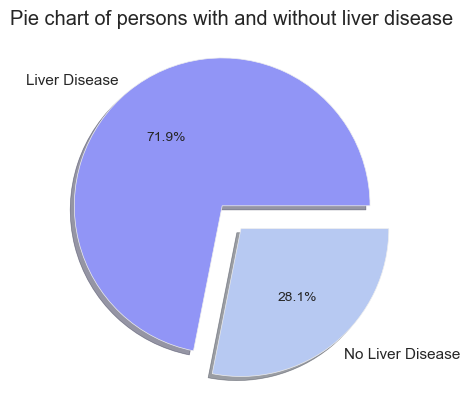

In [40]:
#pie chart of response variable
plt.pie(train['Liver_disease'].value_counts(), labels=['Liver Disease', 'No Liver Disease'], colors=['#9195F6', '#B7C9F2'], explode=[0.1,0.1], autopct='%1.1f%%', shadow=True);
plt.title("Pie chart of persons with and without liver disease");

In [41]:
 ## Most of the patients in the data set are suffering from liver dizease.Approximately 71.9% of the population in the study have liver disease.Around 28.1% of the population do not have liver disease.Around 28.1% of the population do not have liver disease.

In [42]:
## BAR PLOT FOR CATOGORICAL VARIABLE

<Axes: xlabel='count', ylabel='Gender of the patient'>

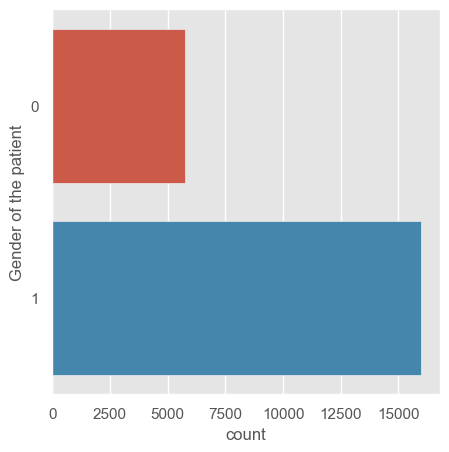

In [43]:
plt.figure(figsize=(5,5))
sns.countplot(y="Gender of the patient",data=X_train)

In [44]:
## Most of the patients were male 

In [45]:
X_train

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Gender of the patient
27896,35.0,0.9,0.2,202.0,20.0,26.0,7.2,4.5,1.66,1
3982,60.0,5.0,2.1,103.0,18.0,40.0,5.0,2.1,1.72,1
6417,57.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
2487,28.0,8.7,4.0,298.0,58.0,138.0,5.8,2.4,0.70,0
3359,45.0,0.8,0.2,163.0,18.0,19.0,6.3,2.8,0.80,1
...,...,...,...,...,...,...,...,...,...,...
8322,75.0,11.0,4.9,750.0,140.0,350.0,5.5,2.1,0.60,1
25473,55.0,0.6,0.1,178.0,26.0,27.0,6.5,3.6,1.20,1
29492,42.0,1.1,0.5,180.0,30.0,42.0,6.9,3.8,1.20,1
5115,57.0,0.8,0.2,279.0,20.0,25.0,7.2,3.2,0.80,1


<function matplotlib.pyplot.show(close=None, block=None)>

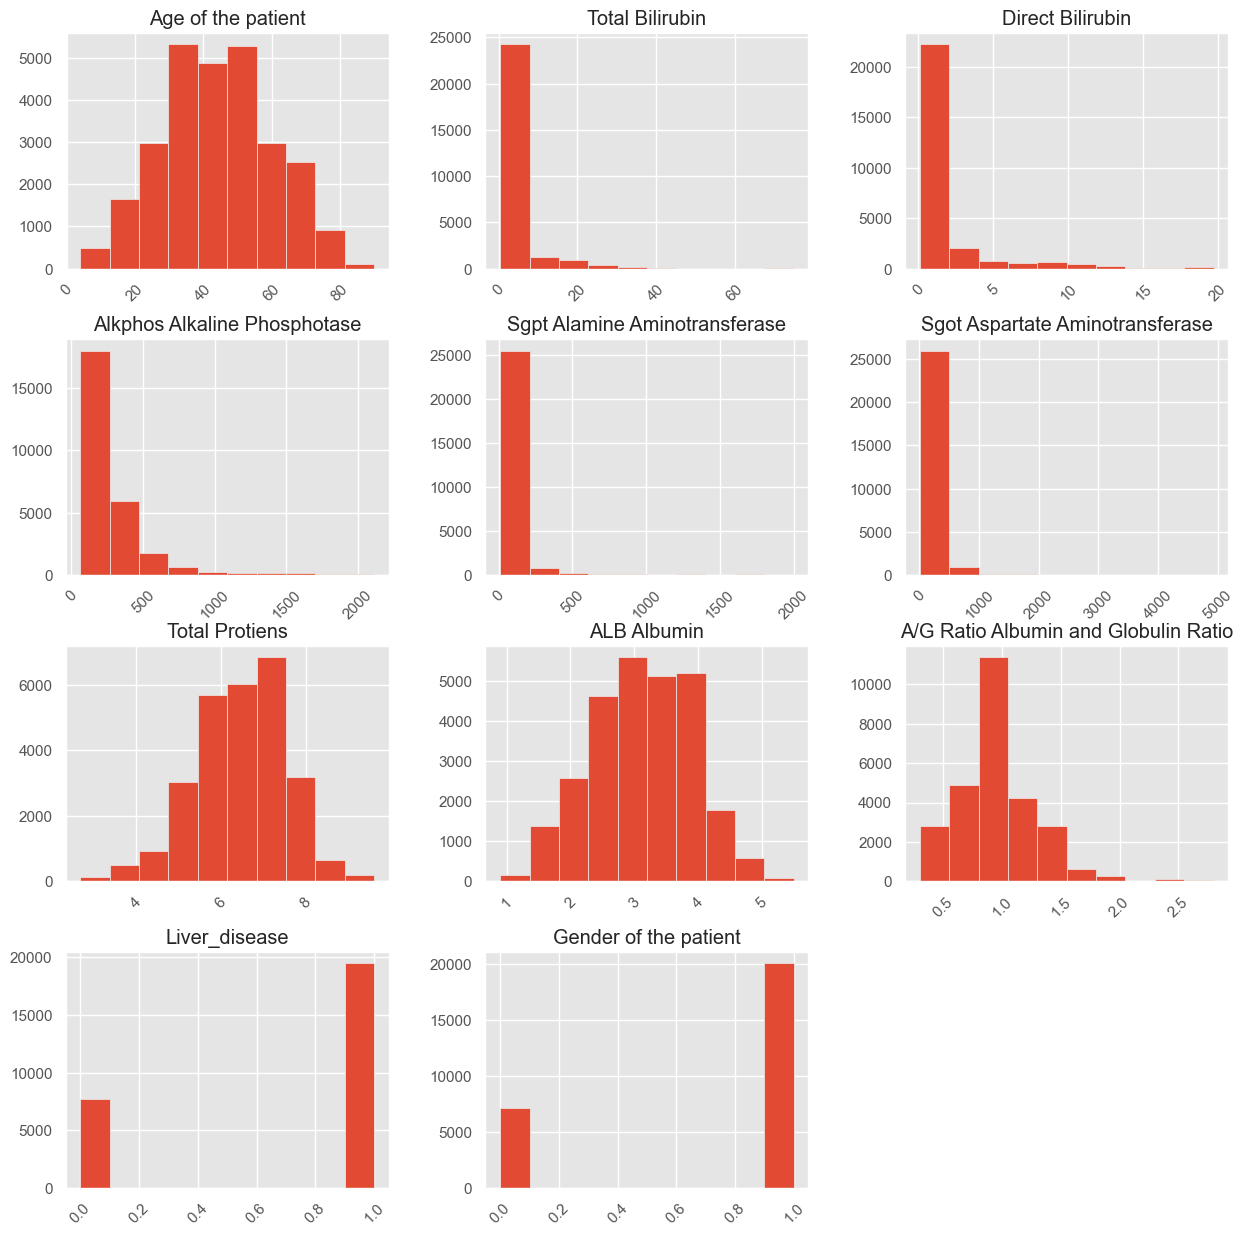

In [46]:
df.hist(figsize=(15,15),xrot=45,bins=10)
plt.show

In [47]:
## Tracking for outliers

In [48]:
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Liver_disease,Gender of the patient
count,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000
mean,44.125046,3.407909,1.541630,290.142021,81.279292,112.102879,6.472605,3.124044,0.943567,0.717210,0.737683
std,15.971563,6.332486,2.895084,239.595473,181.571537,283.616005,1.081477,0.792329,0.324205,0.450363,0.439902
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,0.000000,0.000000
50%,45.000000,1.000000,0.300000,209.000000,36.000000,42.000000,6.600000,3.100000,0.900000,1.000000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.700000,1.100000,1.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000,1.000000


In [49]:
#  Boxplot for Different Numerical Variables

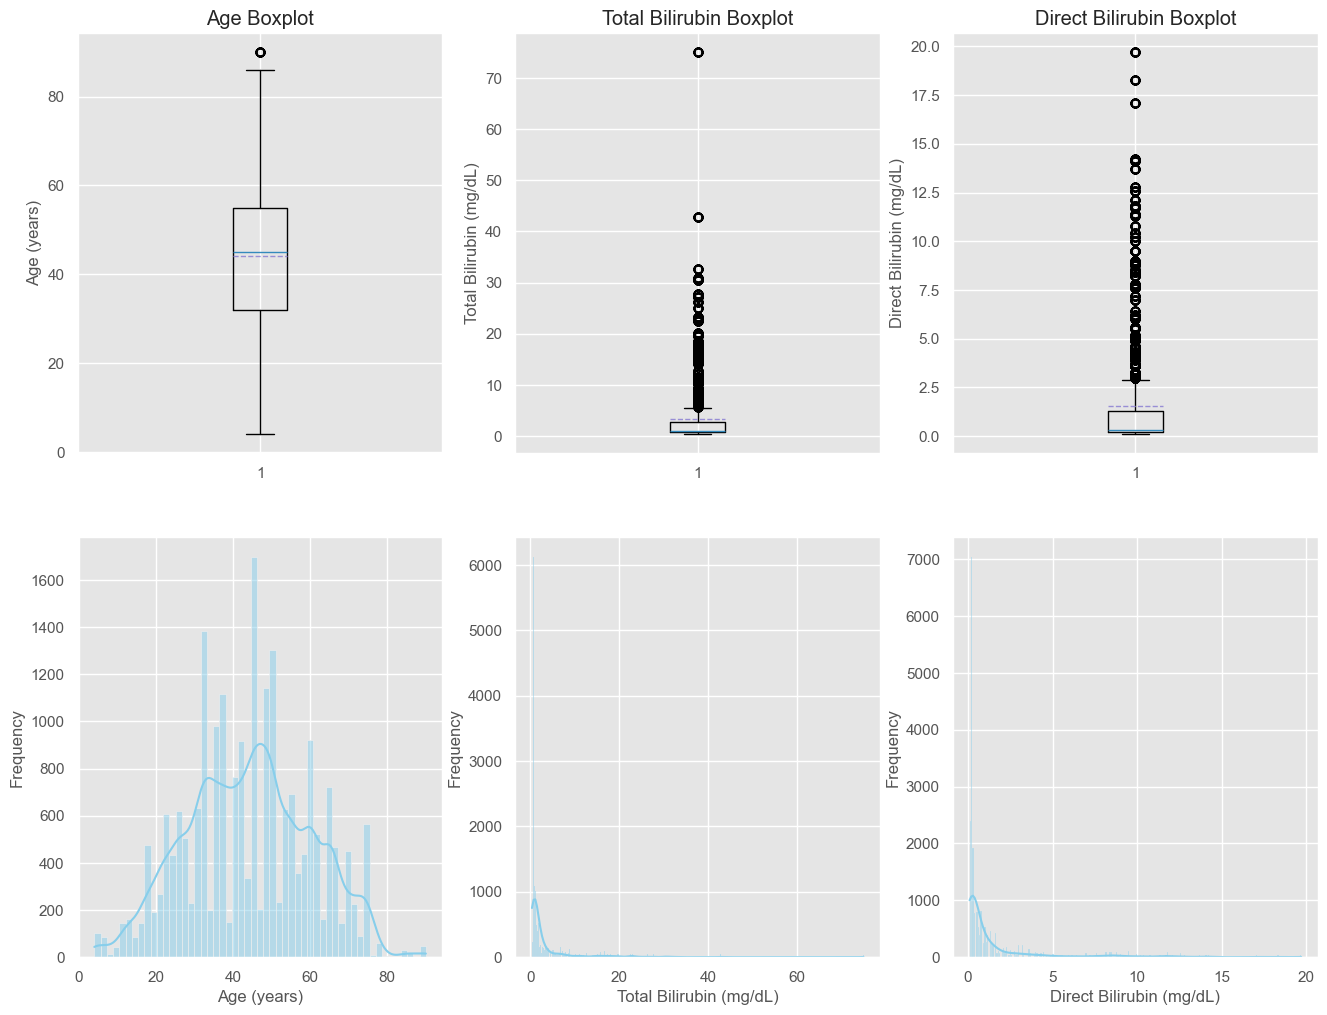

In [50]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=X_train['Age of the patient'], showmeans=True, meanline=True)
plt.title('Age Boxplot')
plt.ylabel('Age (years)')
plt.subplot(234)
sns.histplot(x=X_train['Age of the patient'], kde=True, color='skyblue')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')

plt.subplot(232)
plt.boxplot(X_train['Total Bilirubin'], showmeans=True, meanline=True)
plt.title('Total Bilirubin Boxplot')
plt.ylabel('Total Bilirubin (mg/dL)')
plt.subplot(235)
sns.histplot(X_train['Total Bilirubin'], kde=True, color='skyblue')
plt.xlabel('Total Bilirubin (mg/dL)')
plt.ylabel('Frequency')

plt.subplot(233)
plt.boxplot(x=X_train['Direct Bilirubin'], showmeans=True, meanline=True)
plt.title('Direct Bilirubin Boxplot')
plt.ylabel('Direct Bilirubin (mg/dL)')
plt.subplot(236)
sns.histplot(X_train['Direct Bilirubin'], kde=True, color='skyblue')
plt.xlabel('Direct Bilirubin (mg/dL)')
plt.ylabel('Frequency')

plt.show()


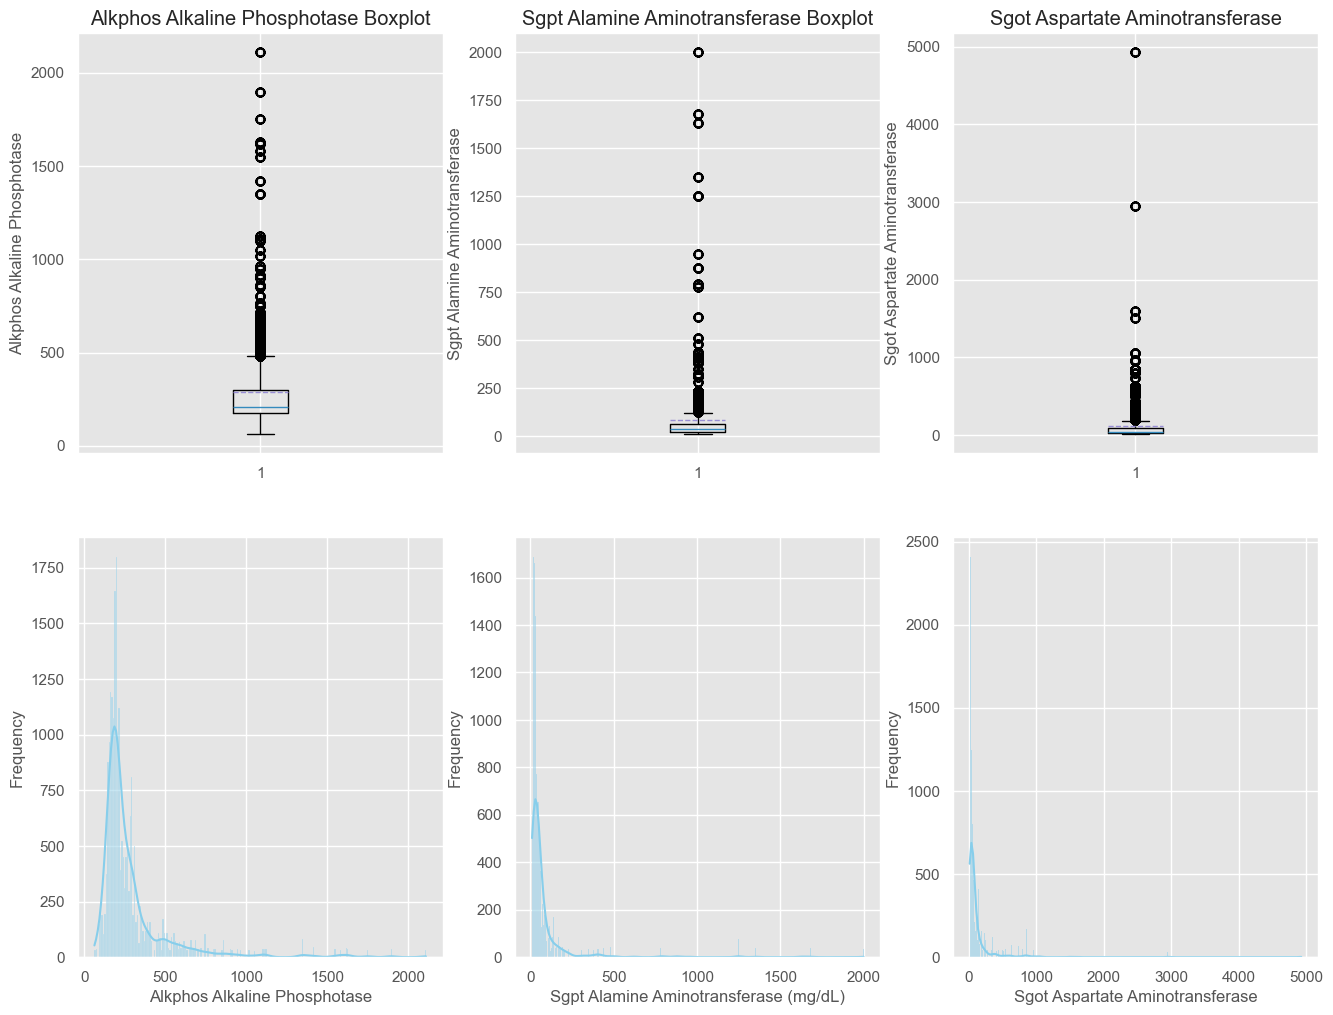

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=X_train['Alkphos Alkaline Phosphotase'], showmeans=True, meanline=True)
plt.title('Alkphos Alkaline Phosphotase Boxplot')
plt.ylabel('Alkphos Alkaline Phosphotase')
plt.subplot(234)
sns.histplot(x=X_train['Alkphos Alkaline Phosphotase'], kde=True, color='skyblue')
plt.xlabel('Alkphos Alkaline Phosphotase')
plt.ylabel('Frequency')

plt.subplot(232)
plt.boxplot(X_train['Sgpt Alamine Aminotransferase'], showmeans=True, meanline=True)
plt.title('Sgpt Alamine Aminotransferase Boxplot')
plt.ylabel('Sgpt Alamine Aminotransferase')
plt.subplot(235)
sns.histplot(X_train['Sgpt Alamine Aminotransferase'], kde=True, color='skyblue')
plt.xlabel('Sgpt Alamine Aminotransferase (mg/dL)')
plt.ylabel('Frequency')

plt.subplot(233)
plt.boxplot(x=X_train['Sgot Aspartate Aminotransferase'], showmeans=True, meanline=True)
plt.title('Sgot Aspartate Aminotransferase')
plt.ylabel('Sgot Aspartate Aminotransferase')
plt.subplot(236)
sns.histplot(X_train['Sgot Aspartate Aminotransferase'], kde=True, color='skyblue')
plt.xlabel('Sgot Aspartate Aminotransferase')
plt.ylabel('Frequency')

plt.show()


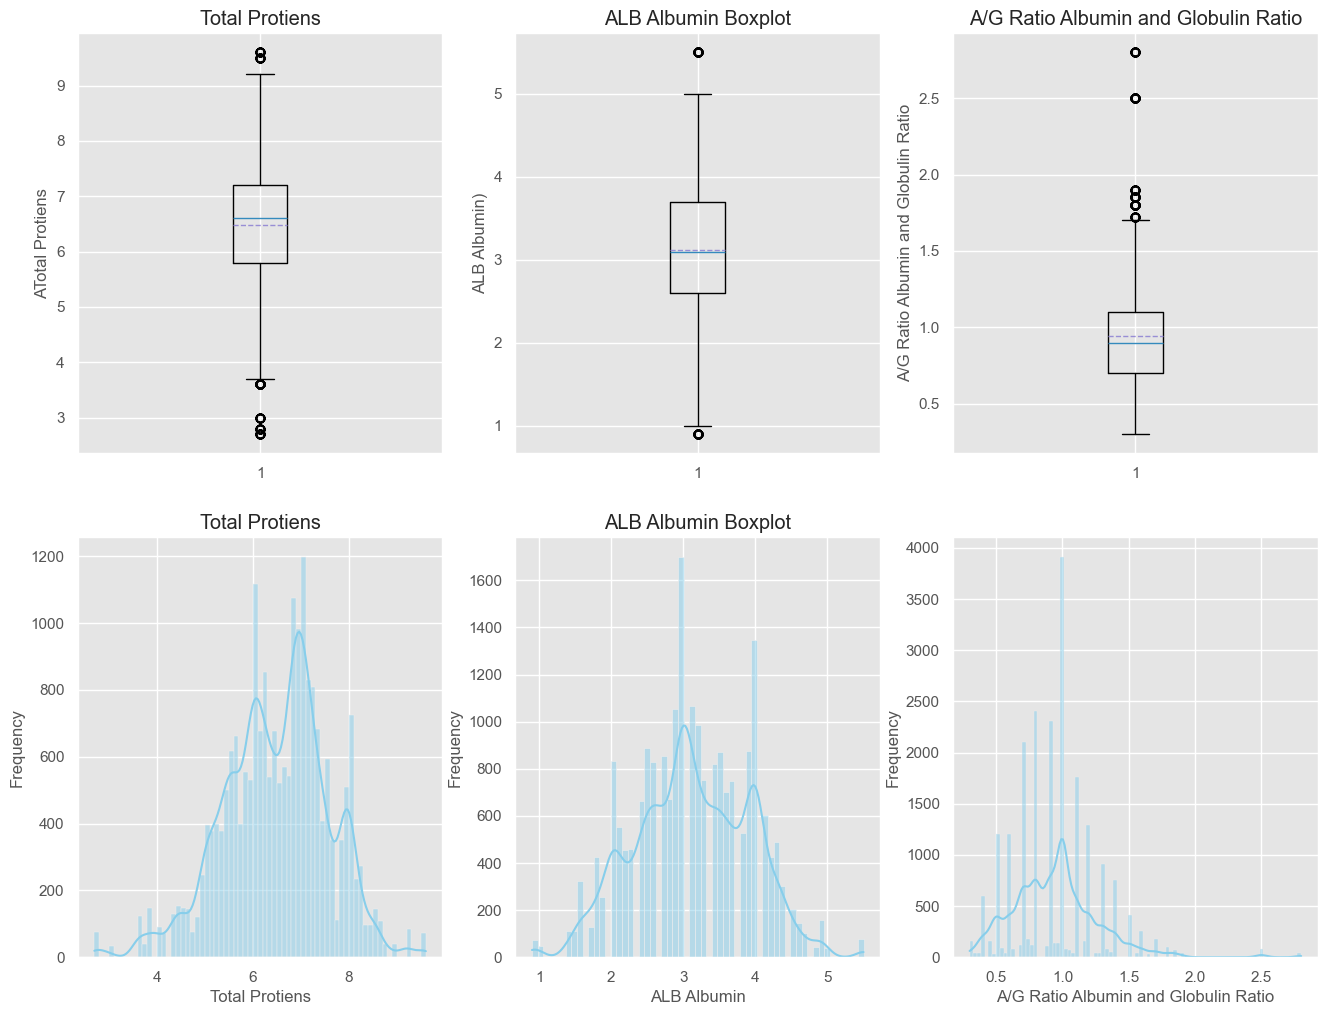

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=X_train['Total Protiens'], showmeans=True, meanline=True)
plt.title('Total Protiens')
plt.ylabel('ATotal Protiens')
plt.subplot(234)
sns.histplot(x=X_train['Total Protiens'], kde=True, color='skyblue')
plt.title('Total Protiens')
plt.ylabel('Frequency')

plt.subplot(232)
plt.boxplot(X_train['ALB Albumin'], showmeans=True, meanline=True)
plt.title('ALB Albumin Boxplot')
plt.ylabel('ALB Albumin)')
plt.subplot(235)
sns.histplot(X_train['ALB Albumin'], kde=True, color='skyblue')
plt.title('ALB Albumin Boxplot')
plt.ylabel('Frequency')

plt.subplot(233)
plt.boxplot(x=X_train['A/G Ratio Albumin and Globulin Ratio'], showmeans=True, meanline=True)
plt.title('A/G Ratio Albumin and Globulin Ratio')
plt.ylabel('A/G Ratio Albumin and Globulin Ratio')
plt.subplot(236)
sns.histplot(X_train['A/G Ratio Albumin and Globulin Ratio'], kde=True, color='skyblue')
plt.xlabel('A/G Ratio Albumin and Globulin Ratio')
plt.ylabel('Frequency')

plt.show()


In [53]:
## X data are skewed

In [54]:
## Checking Outliers :  Scatter Plot Maatrix

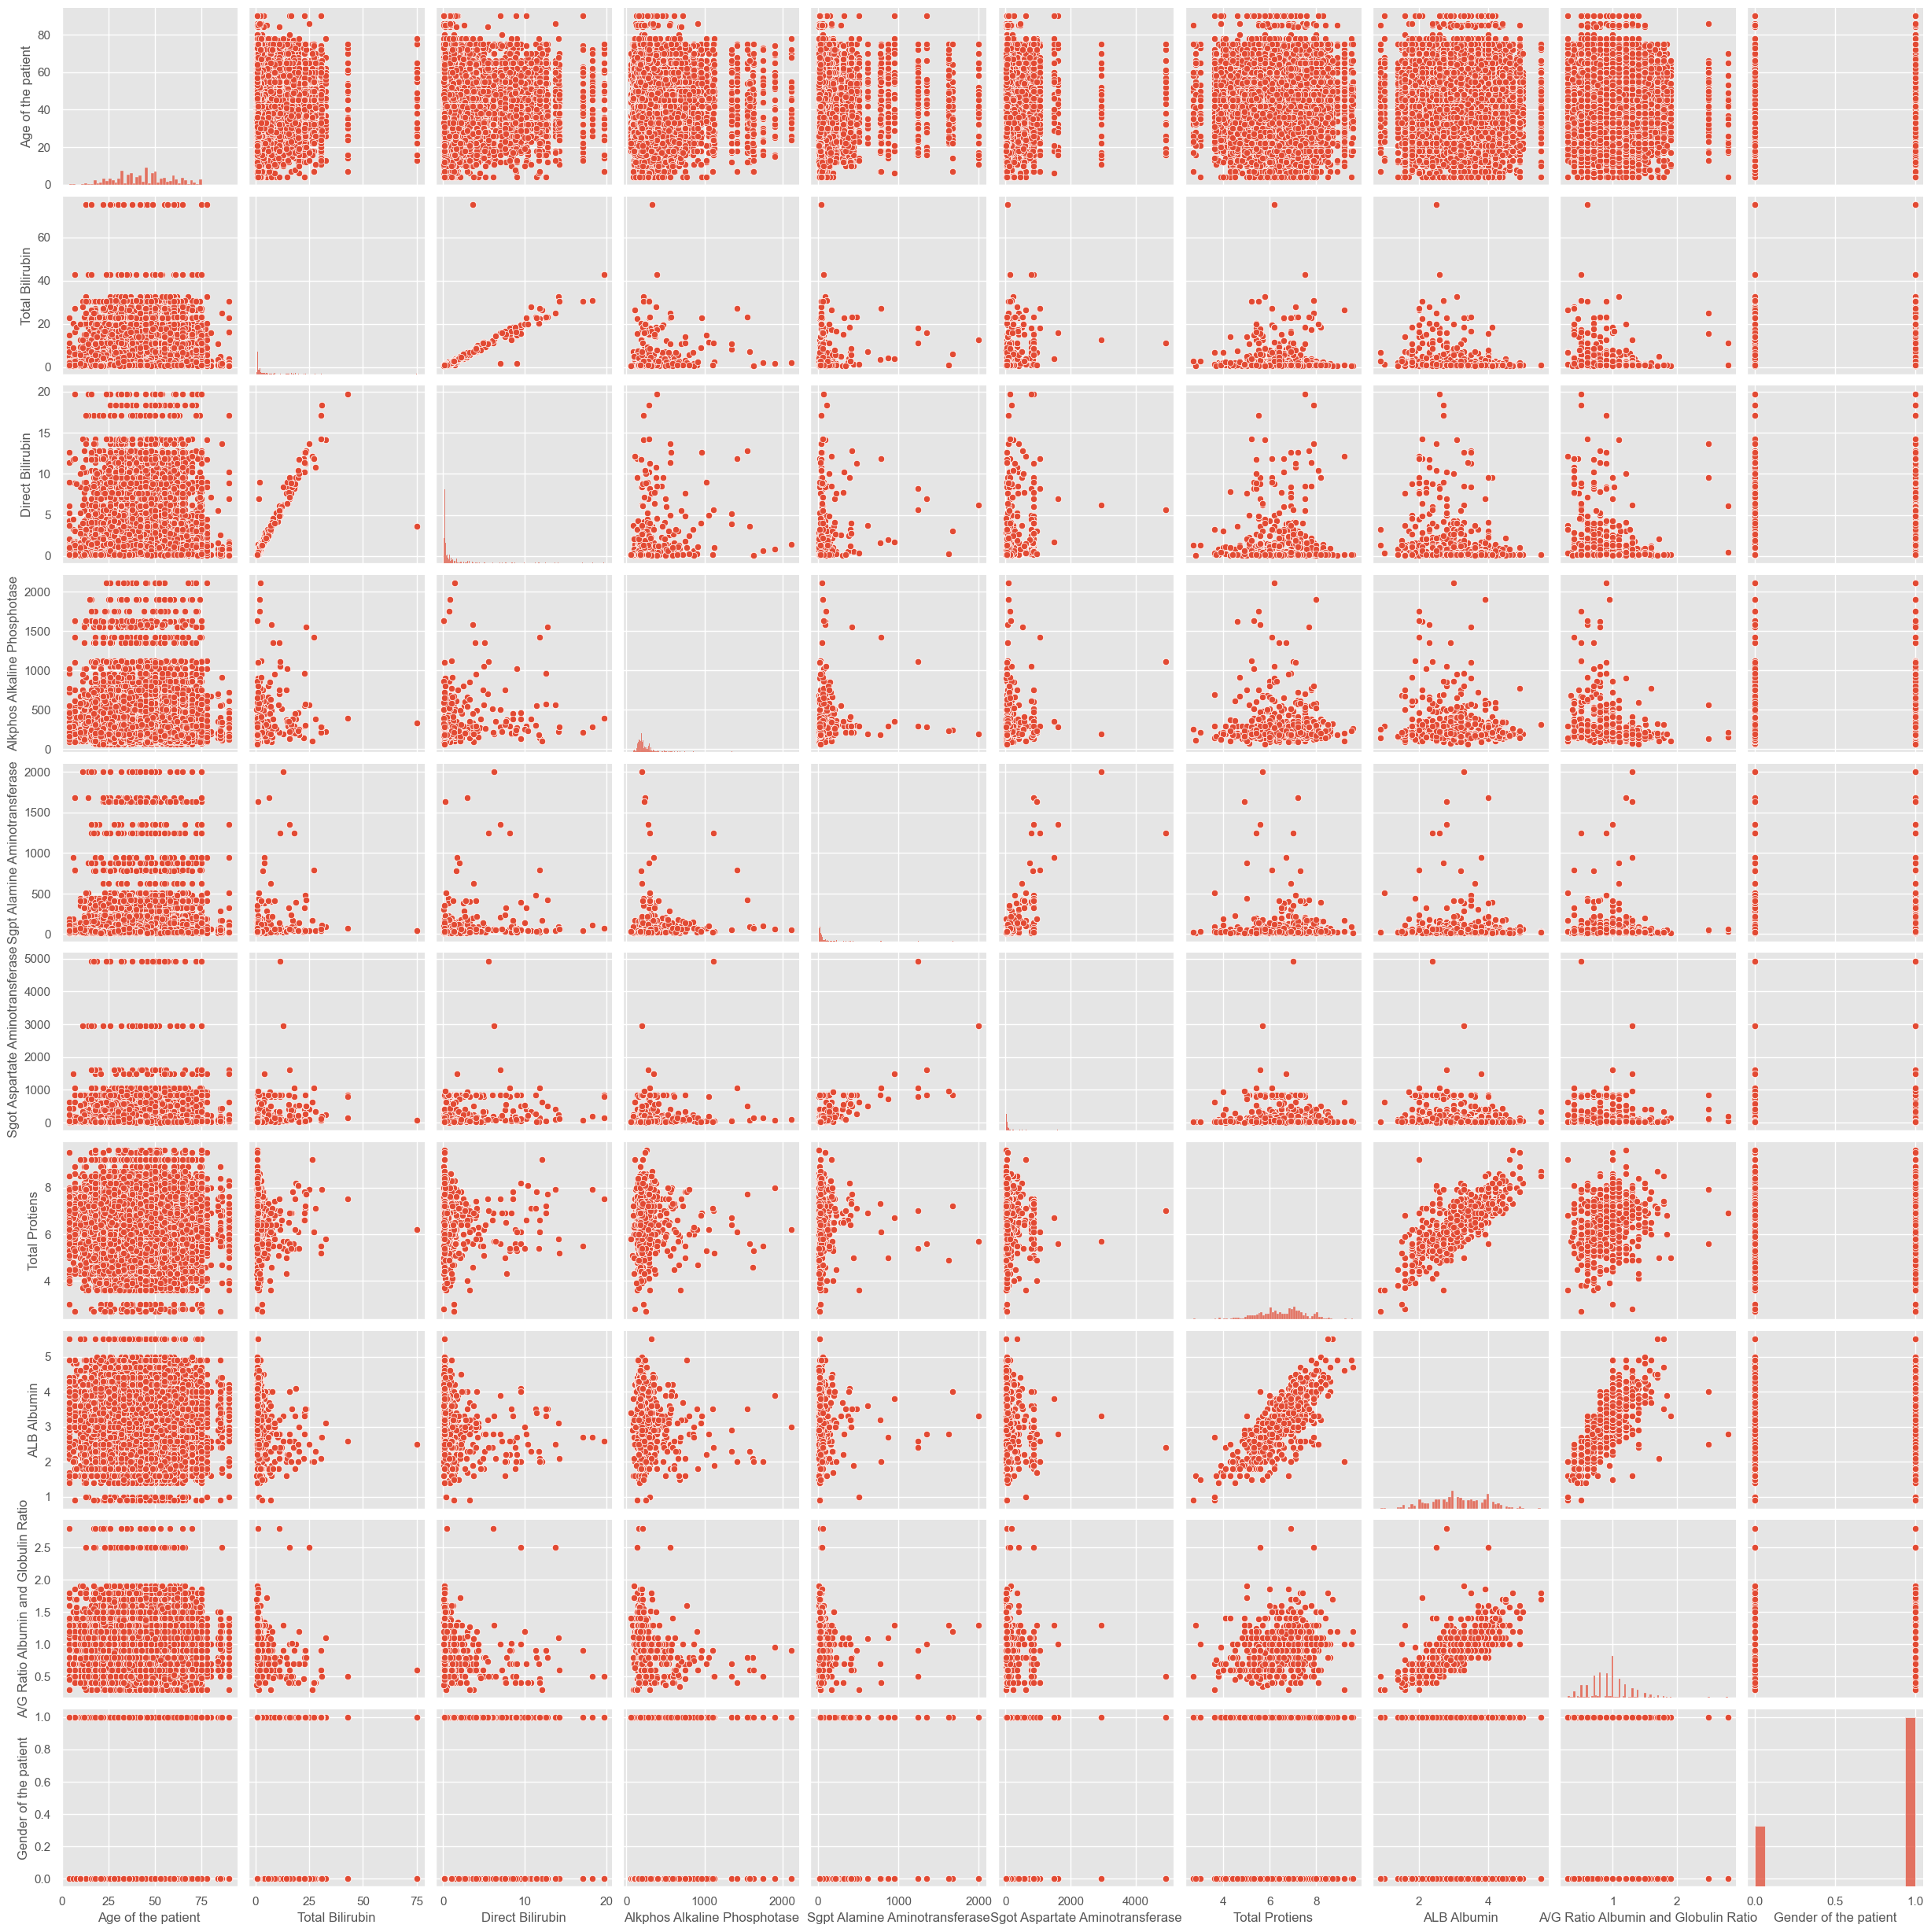

In [55]:
# Generate the pairplot
pairplot = sns.pairplot(X_train)

# Save the pairplot as an image file
#pairplot.savefig('pairplot.png')

# Show the pairplot
plt.show()



In [56]:
## Bivariate Analysis 

In [57]:
## mphasizes the higher prevalence of liver disease among males compared to females.import pandas as pd

In [58]:

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(X_train['Gender of the patient'], y_train)

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


Contingency Table:
Liver_disease             0      1
Gender of the patient             
0                      1604   4130
1                      4503  11489

Chi-Square Statistic: 0.062142952205099765
p-value: 0.8031404249782508
Degrees of Freedom: 1
Expected Frequencies:
[[ 1611.78026328  4122.21973672]
 [ 4495.21973672 11496.78026328]]


In [59]:
#  Since the p-value (0.8031) is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. Therefore, we do not have sufficient evidence to conclude that there is a statistically significant association between gender and liver disease in the given data.

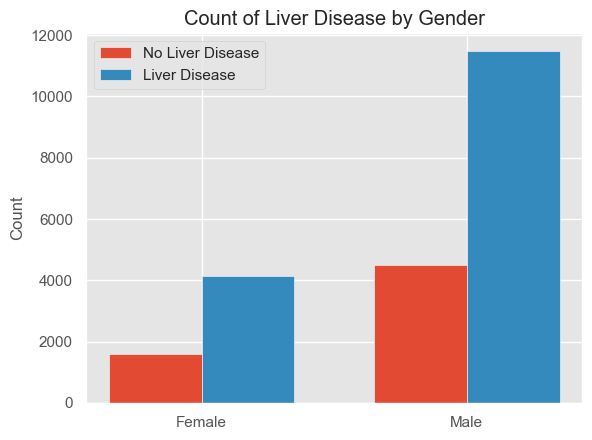

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Data for plotting
gender_labels = ['Female', 'Male']
disease_labels = ['No Liver Disease', 'Liver Disease']
counts = contingency_table.values

# Plotting
fig, ax = plt.subplots()
width = 0.35
x = list(range(len(gender_labels)))  # Convert range object to a list

rects1 = ax.bar([val - width/2 for val in x], counts[:,0], width, label=disease_labels[0])  # Corrected calculation
rects2 = ax.bar([val + width/2 for val in x], counts[:,1], width, label=disease_labels[1])  # Corrected calculation

# Add labels, title, and legend
ax.set_ylabel('Count')
ax.set_title('Count of Liver Disease by Gender')
ax.set_xticks(x)
ax.set_xticklabels(gender_labels)
ax.legend()

# Display the plot
plt.show()


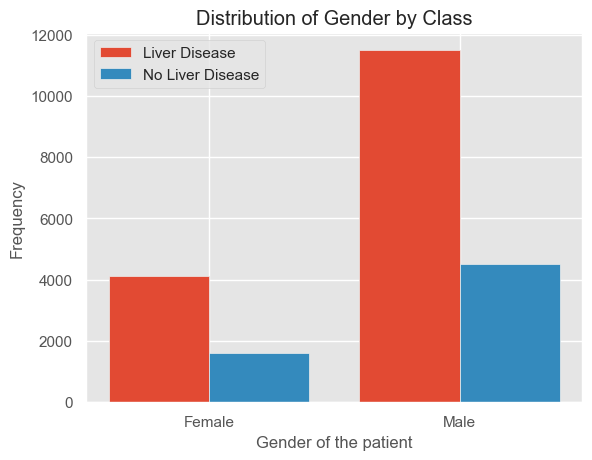

In [61]:


# Plot histogram for Gender in the training set, separated by class
plt.hist(x=[X_train[y == 1]['Gender of the patient'], X_train[y == 0]['Gender of the patient']], label=['Liver Disease', 'No Liver Disease'], bins=2)
plt.xlabel('Gender of the patient')
plt.ylabel('Frequency')
plt.title('Distribution of Gender by Class')
plt.legend()

# Set the tick labels for the x-axis
plt.xticks(ticks=[0.25, 0.75], labels=['Female', 'Male'])

plt.show()




In [62]:
# Get column names of the training set
train_columns = X_train.columns

# Print the column names
print("Column names of the train set:")
print(train_columns)


Column names of the train set:
Index(['Age of the patient', 'Total Bilirubin', 'Direct Bilirubin',
       'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase',
       'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Gender of the patient'],
      dtype='object')


Comparing Different variables uding  different cariables

In [63]:
df

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Liver_disease,Gender of the patient
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,0
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,1
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,1
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,1
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1,1
30687,55.0,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1,1
30688,54.0,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1,1
30689,48.0,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1,0


AGE VS LIVER DISEASE

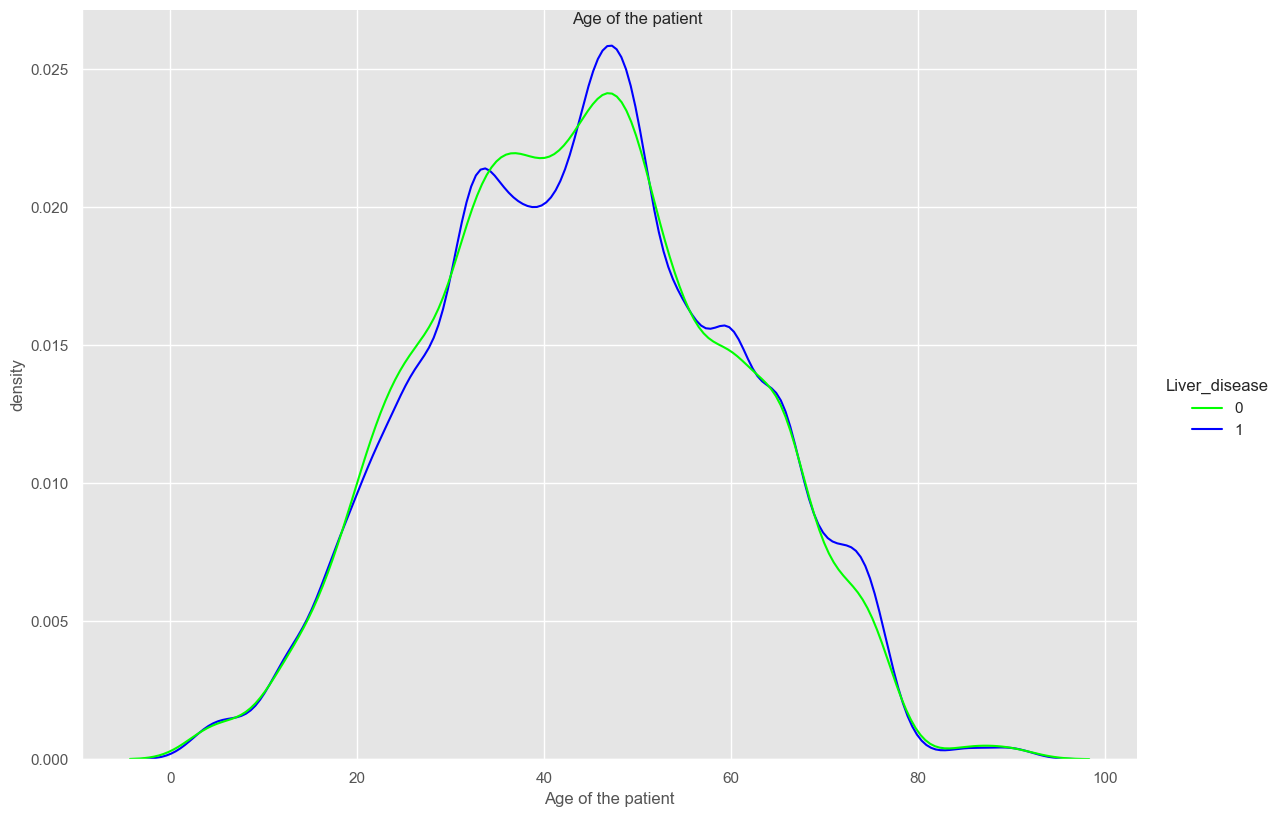

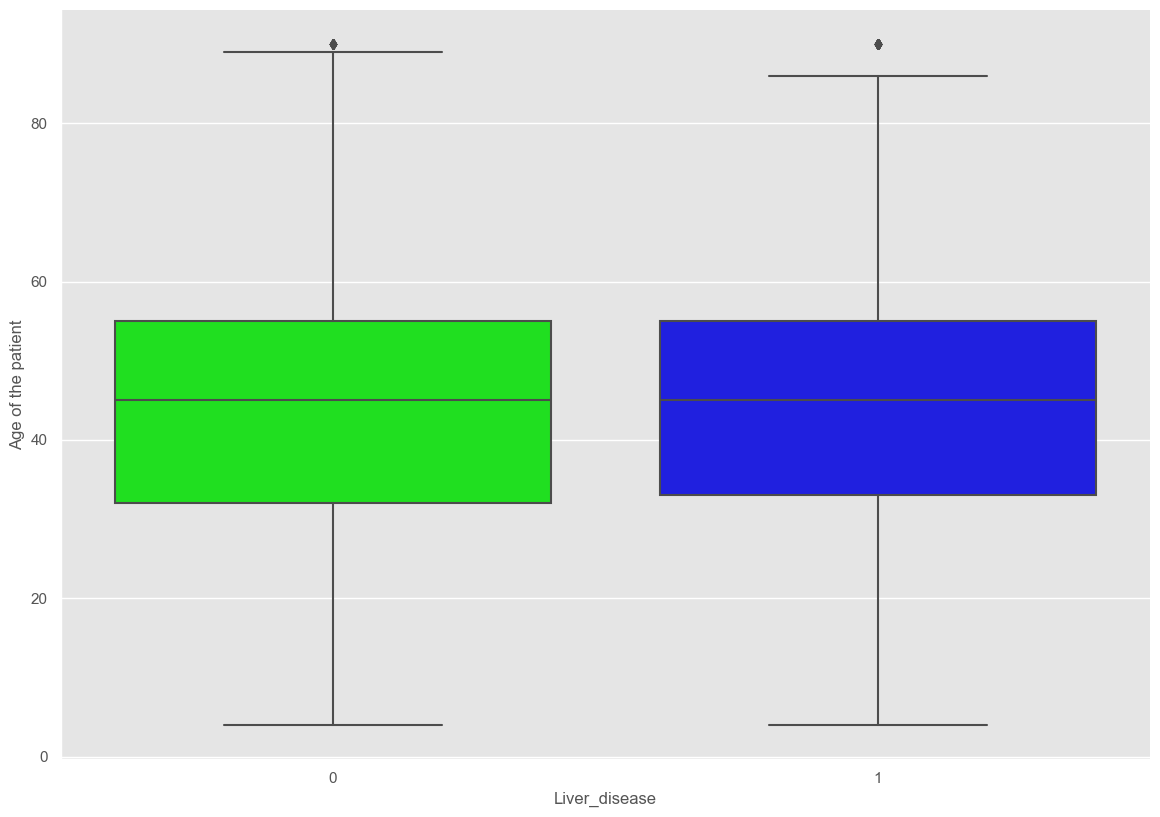

In [64]:

custom_colors = ["#00FF00", "#0000FF"]

ax = sns.displot(data=train, x="Age of the patient", kind="kde", hue="Liver_disease", 
                 common_norm=False, height=8.27, aspect=11.7/8.27, palette=custom_colors)
ax.set_axis_labels("Age of the patient", "density")
ax.fig.suptitle("Age of the patient")
ax = sns.catplot(data=df, x='Liver_disease', y='Age of the patient', kind='box',
                 height=8.27, aspect=11.7/8.27, palette=custom_colors)



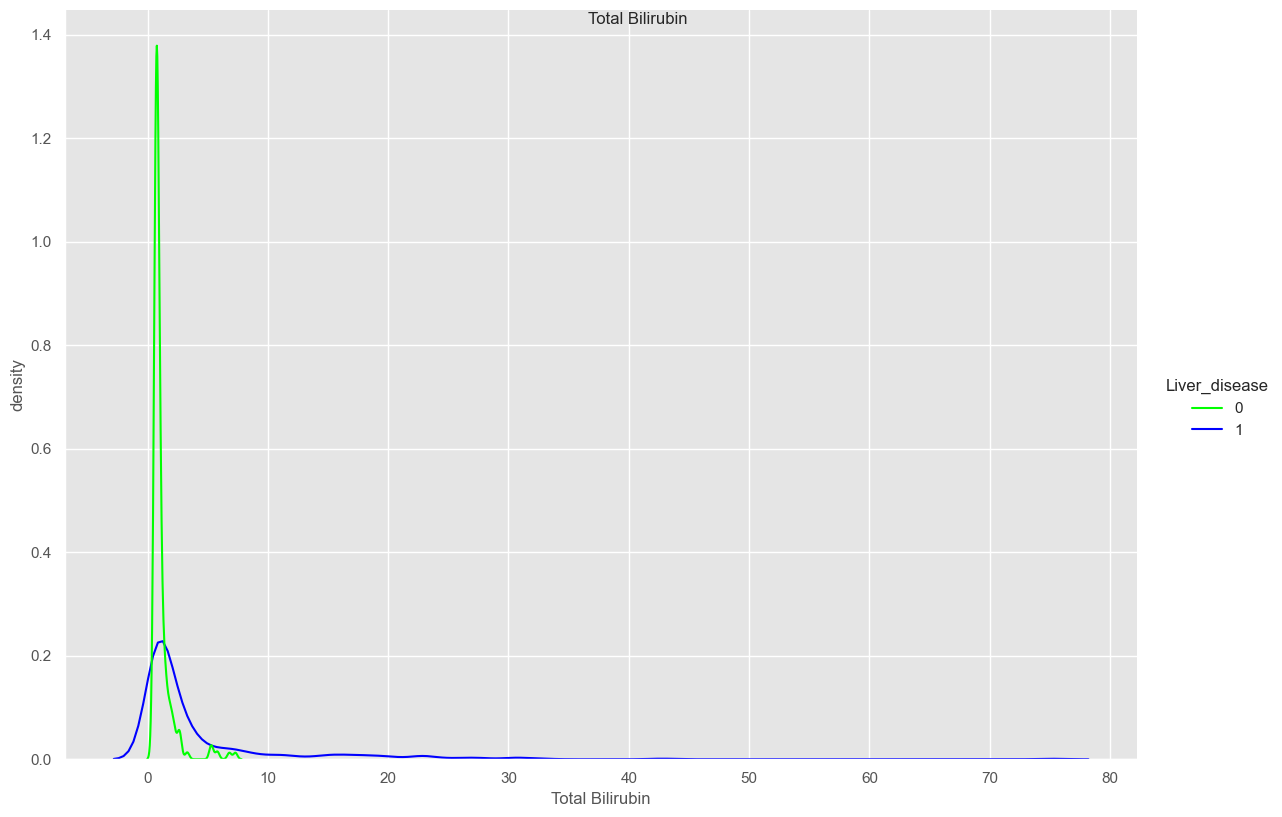

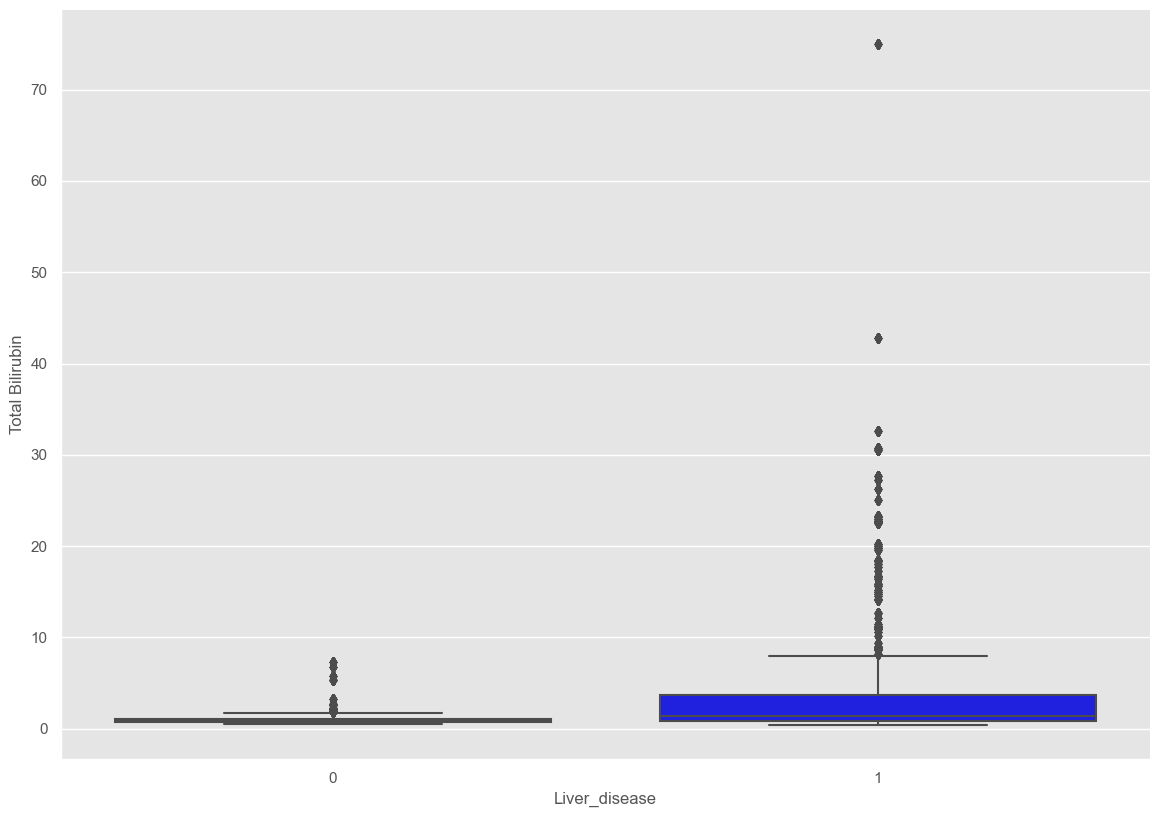

In [65]:
ax = sns.displot(data=train, x="Total Bilirubin", kind="kde", hue="Liver_disease",
                 common_norm=False, height=8.27, aspect=11.7/8.27, palette=custom_colors)
ax.set_axis_labels("Total Bilirubin", "density")
ax.fig.suptitle("Total Bilirubin")
ax = sns.catplot(data=train, x='Liver_disease', y='Total Bilirubin', kind='box',
                 height=8.27, aspect=11.7/8.27, palette=custom_colors)

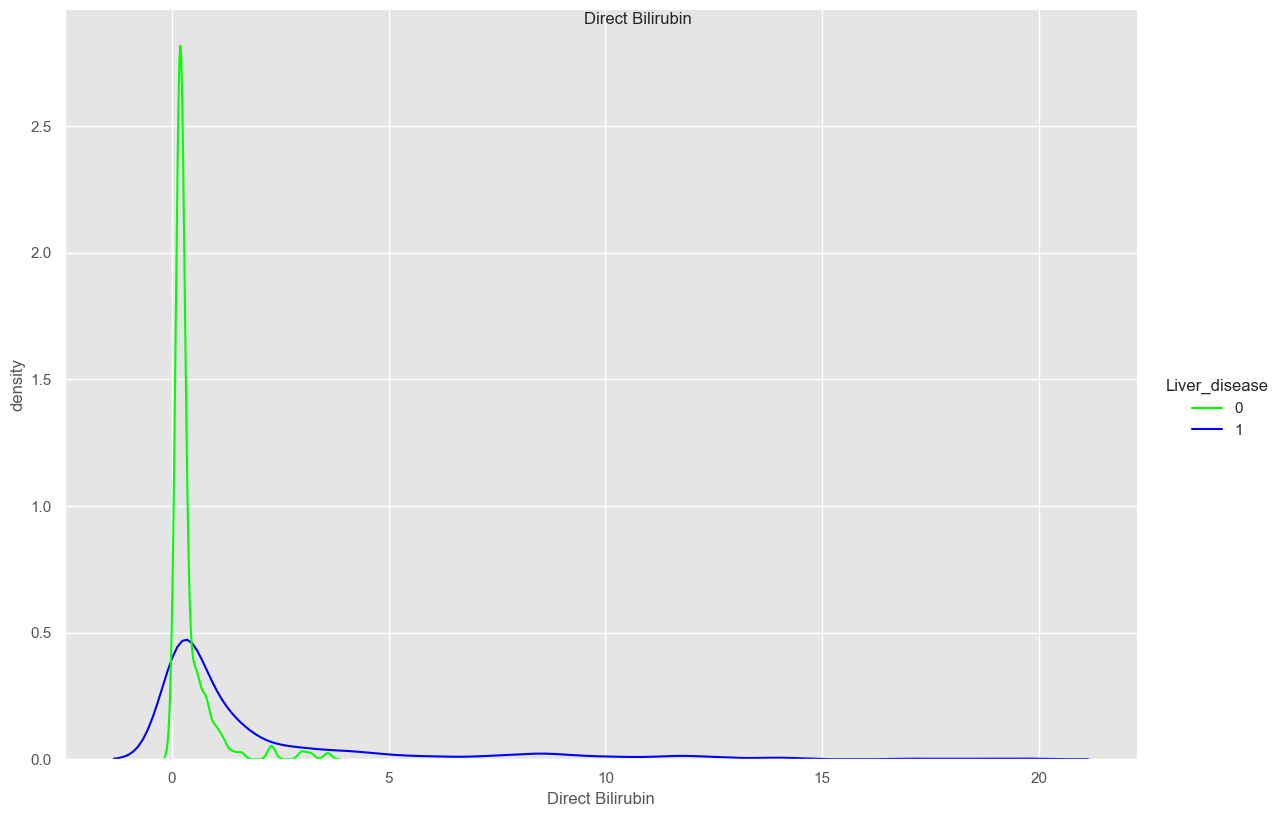

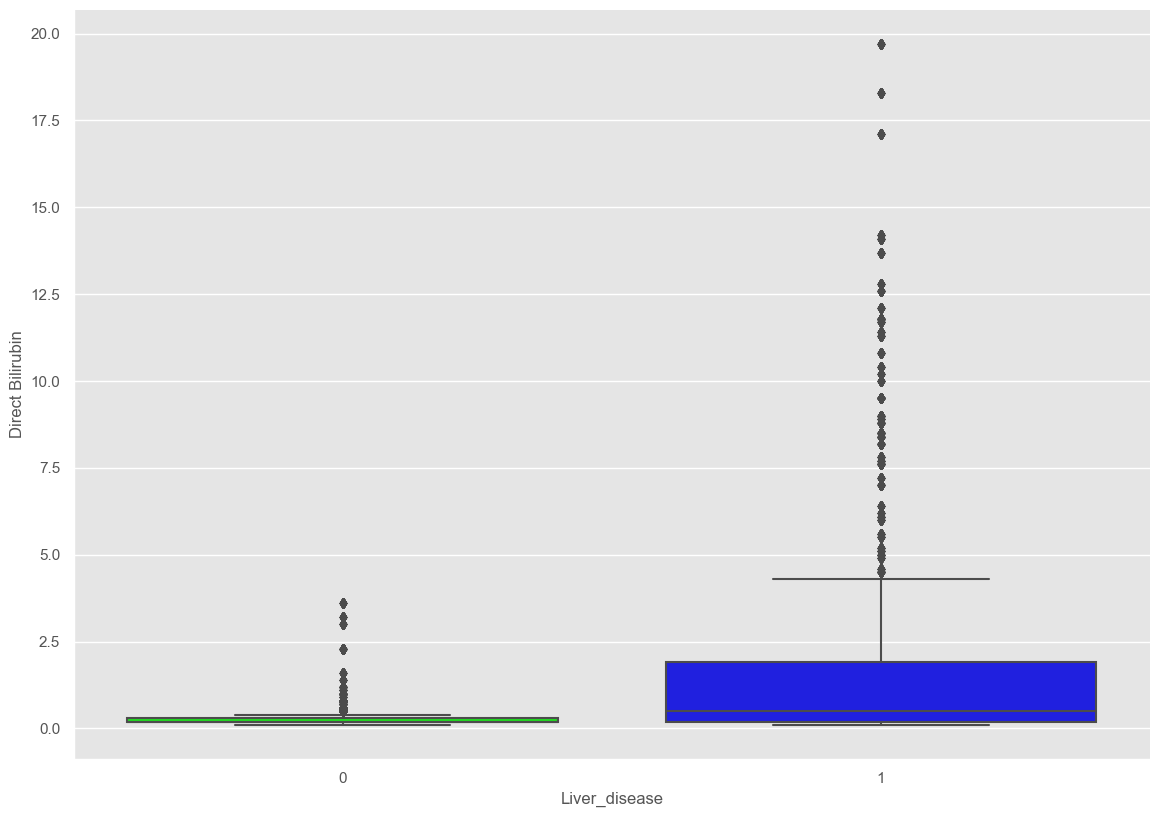

In [66]:
ax = sns.displot(data=train, x="Direct Bilirubin", kind="kde", hue="Liver_disease",
                 common_norm=False, height=8.27, aspect=11.7/8.27, palette=custom_colors)
ax.set_axis_labels("Direct Bilirubin", "density")
ax.fig.suptitle("Direct Bilirubin")
ax = sns.catplot(data=train, x='Liver_disease', y='Direct Bilirubin', kind='box',
                 height=8.27, aspect=11.7/8.27, palette=custom_colors)

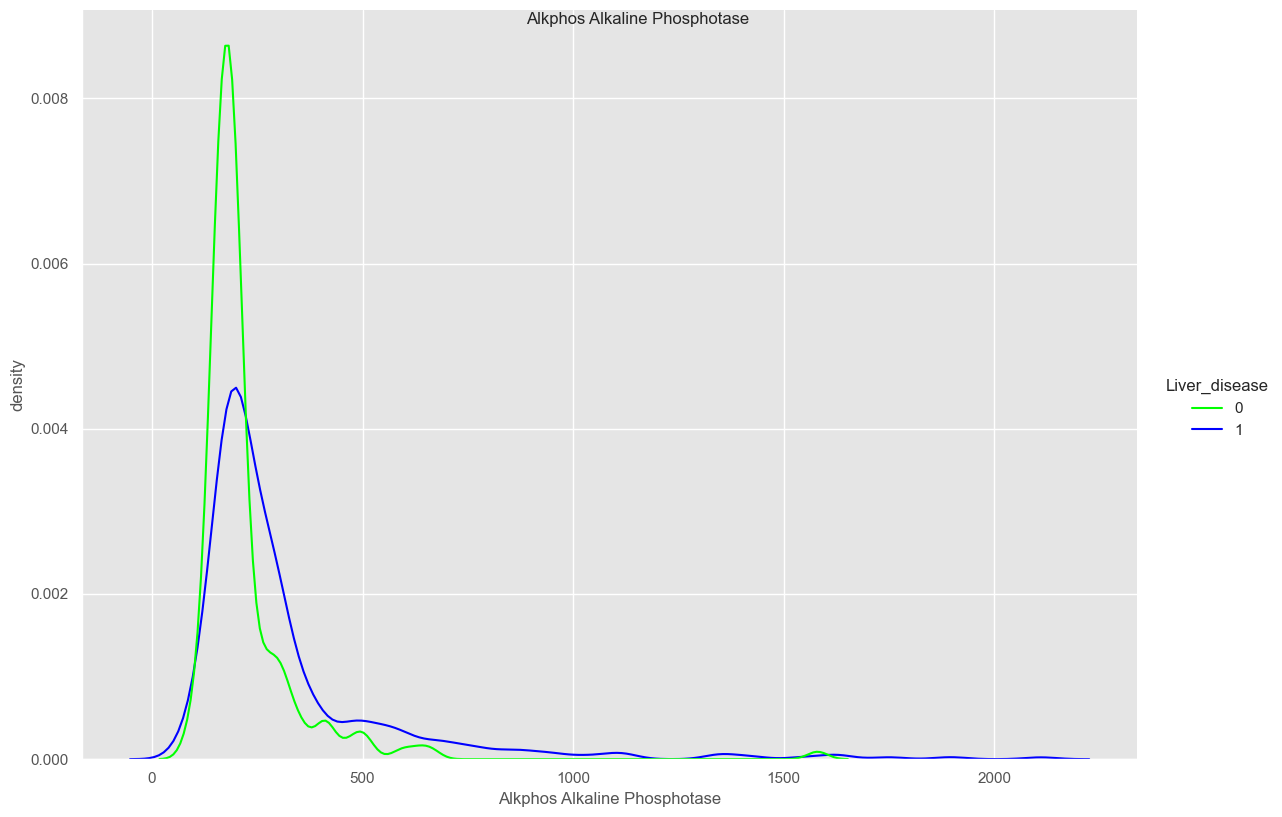

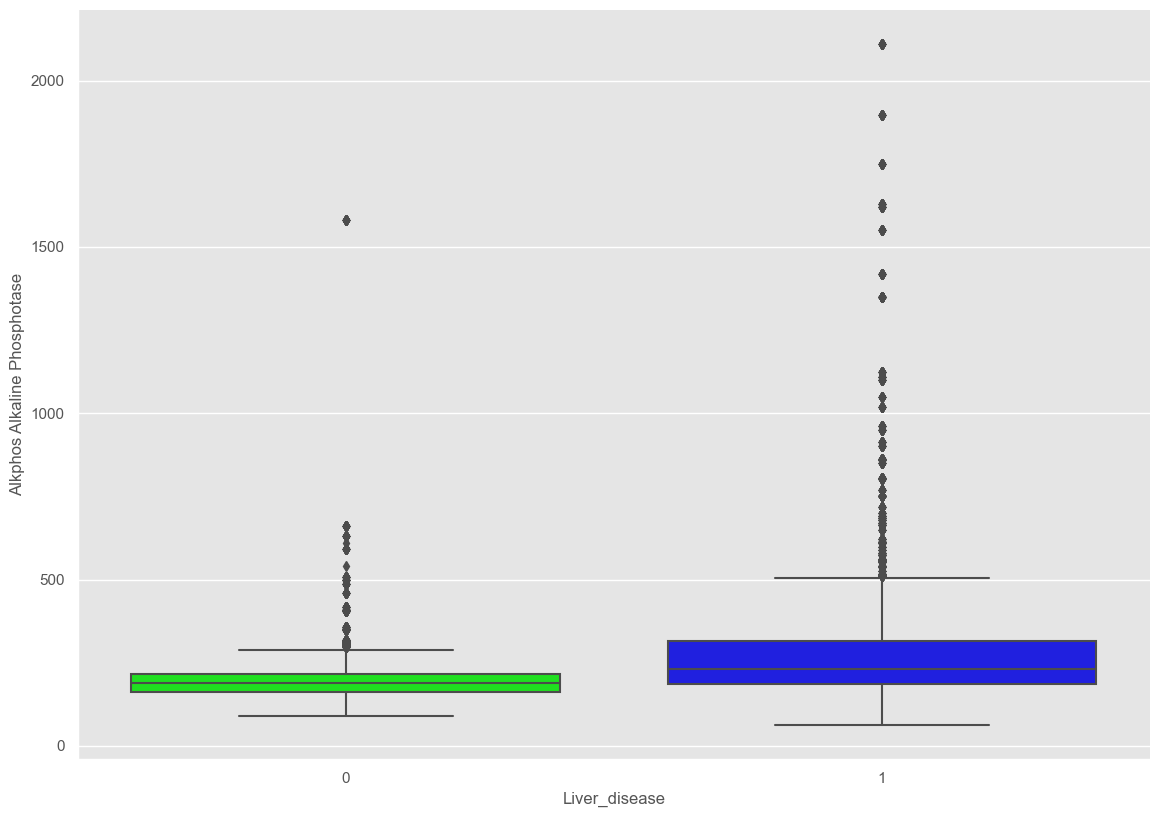

In [67]:
ax = sns.displot(data=train, x="Alkphos Alkaline Phosphotase", kind="kde", hue="Liver_disease",
                 common_norm=False, height=8.27, aspect=11.7/8.27, palette=custom_colors)
ax.set_axis_labels("Alkphos Alkaline Phosphotase", "density")
ax.fig.suptitle("Alkphos Alkaline Phosphotase")
ax = sns.catplot(data=train, x='Liver_disease', y='Alkphos Alkaline Phosphotase', kind='box',
                 height=8.27, aspect=11.7/8.27, palette=custom_colors)

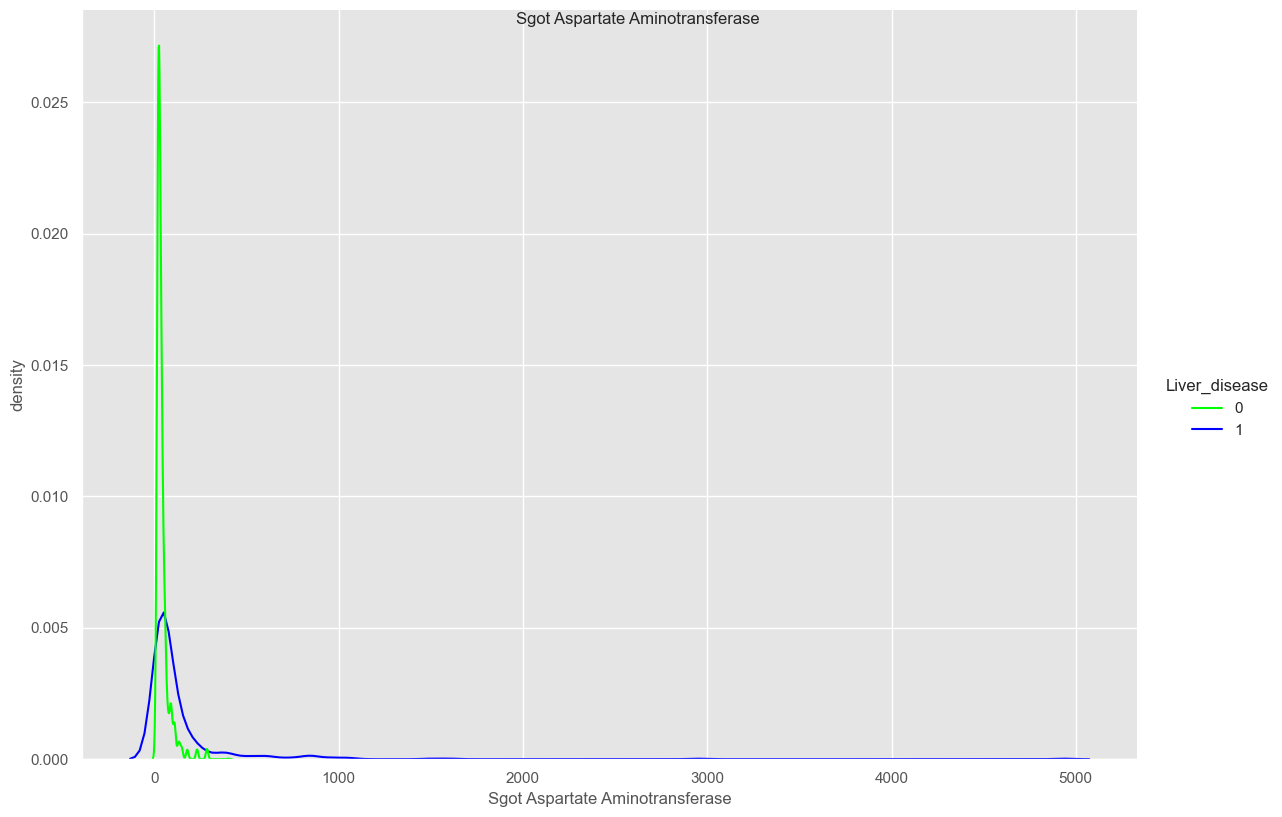

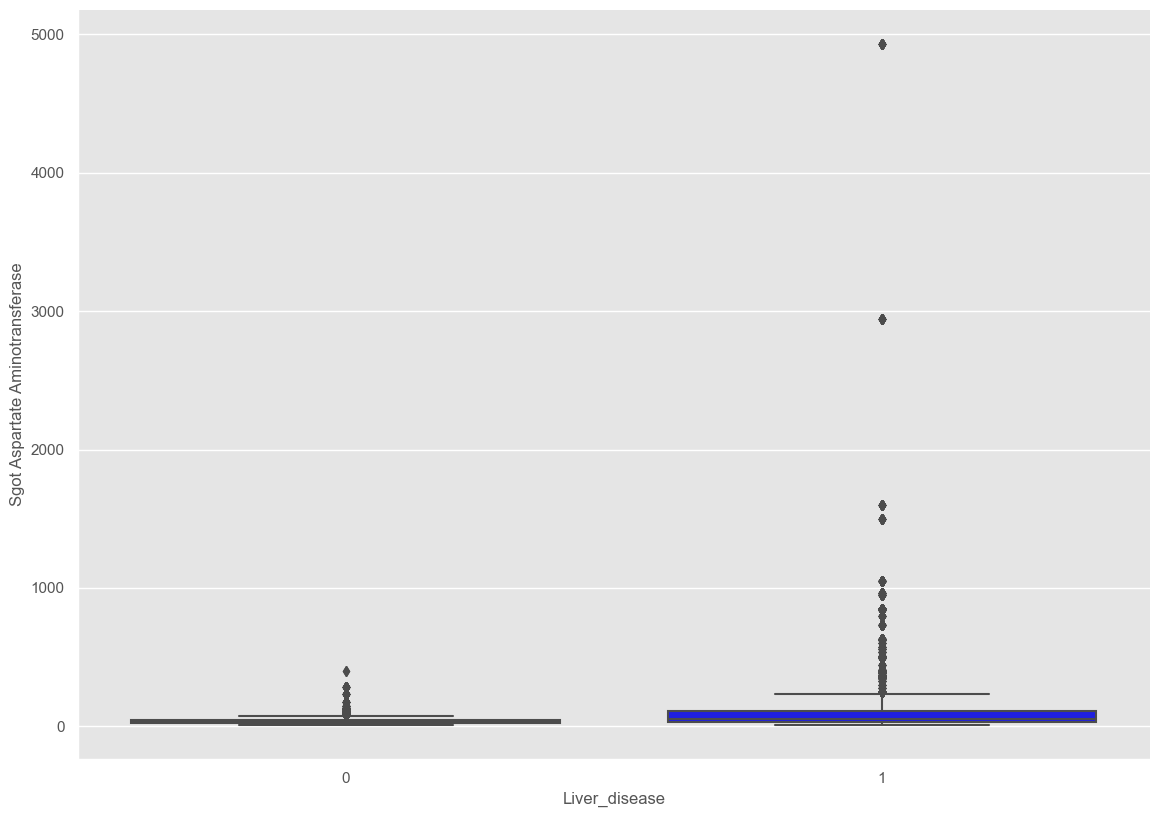

In [68]:
ax = sns.displot(data=train, x="Sgot Aspartate Aminotransferase", kind="kde", hue="Liver_disease",
                 common_norm=False, height=8.27, aspect=11.7/8.27, palette=custom_colors)
ax.set_axis_labels("Sgot Aspartate Aminotransferase", "density")
ax.fig.suptitle("Sgot Aspartate Aminotransferase")
ax = sns.catplot(data=train, x='Liver_disease', y='Sgot Aspartate Aminotransferase', kind='box',
                 height=8.27, aspect=11.7/8.27, palette=custom_colors)

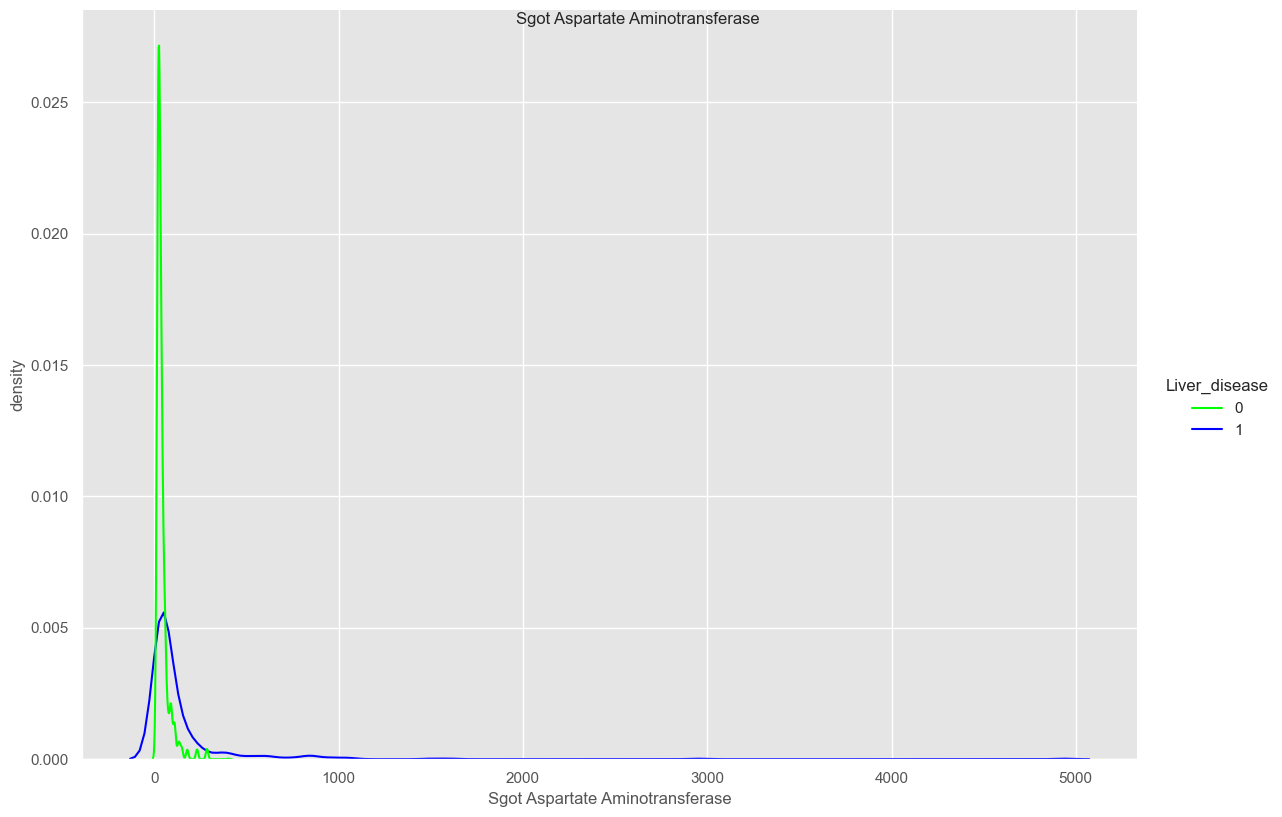

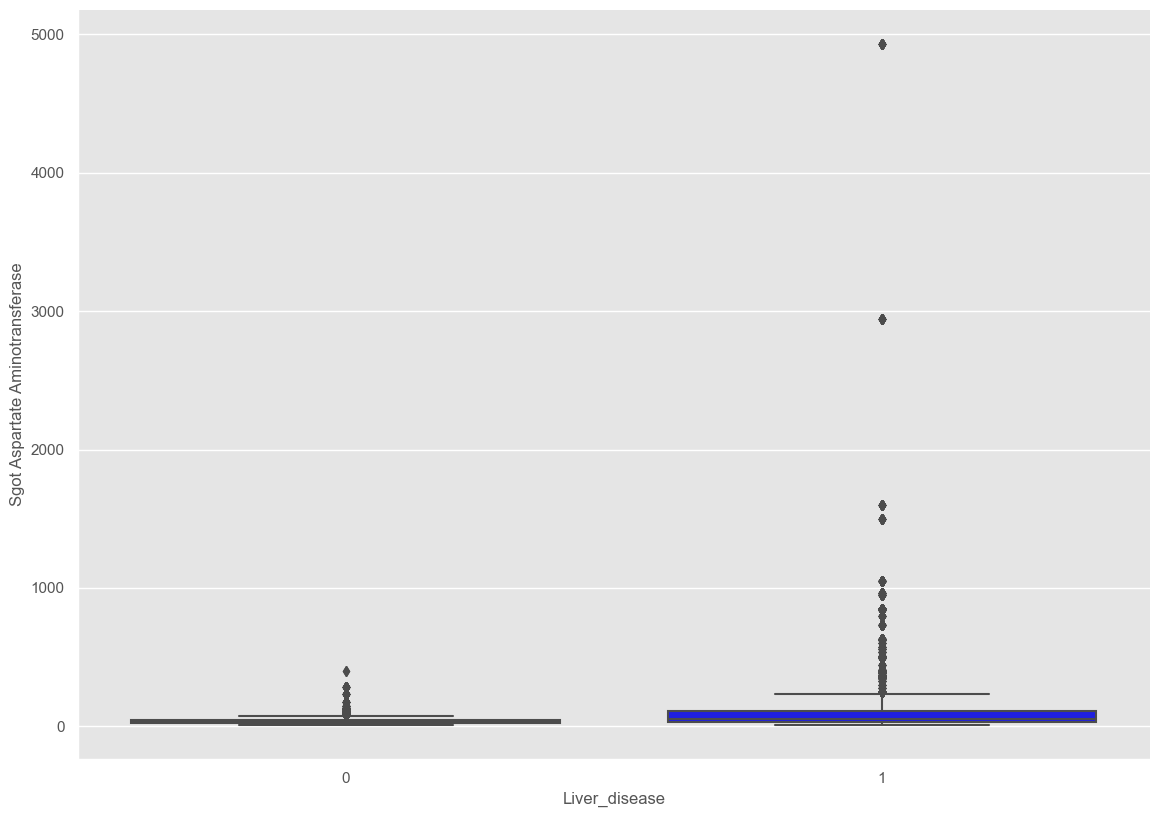

In [69]:
ax = sns.displot(data=train, x="Sgot Aspartate Aminotransferase", kind="kde", hue="Liver_disease",
                 common_norm=False, height=8.27, aspect=11.7/8.27, palette=custom_colors)
ax.set_axis_labels("Sgot Aspartate Aminotransferase", "density")
ax.fig.suptitle("Sgot Aspartate Aminotransferase")
ax = sns.catplot(data=train, x='Liver_disease', y='Sgot Aspartate Aminotransferase', kind='box',
                 height=8.27, aspect=11.7/8.27, palette=custom_colors)

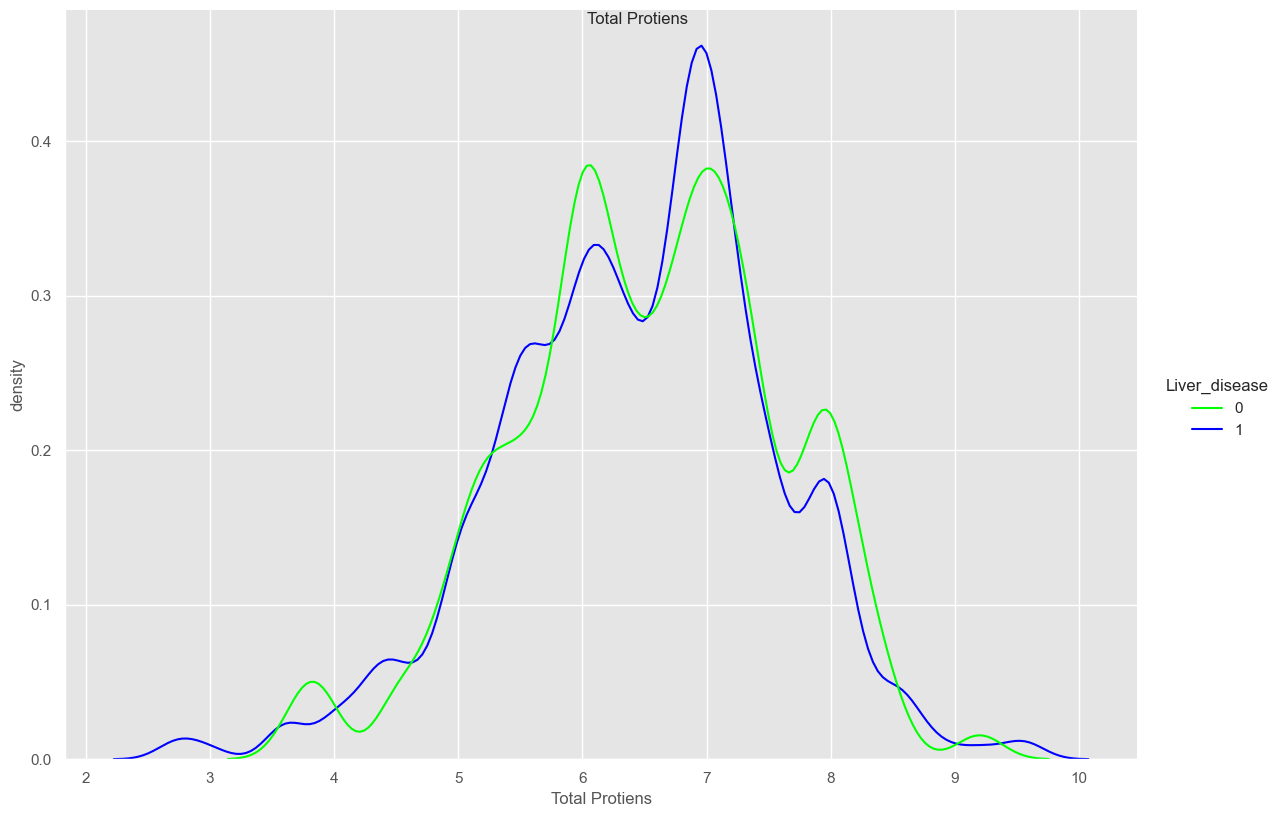

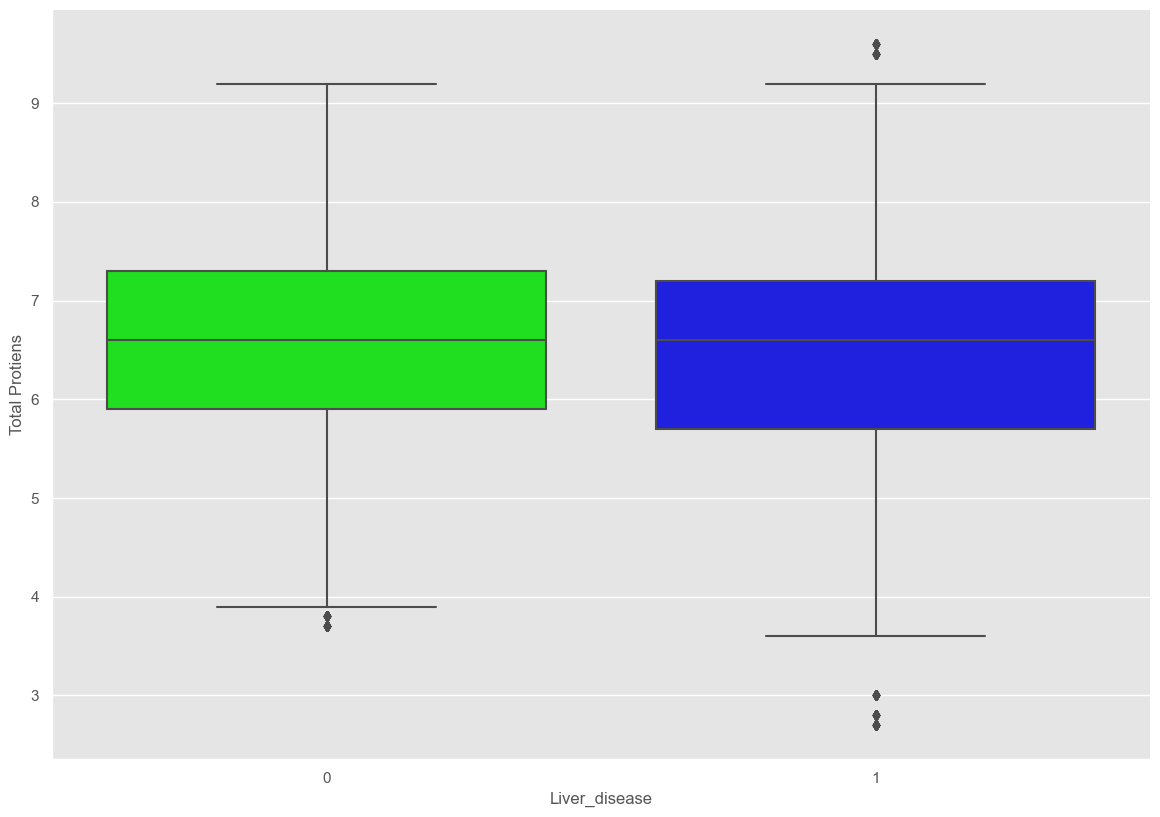

In [70]:
ax = sns.displot(data=train, x="Total Protiens", kind="kde", hue="Liver_disease",
                 common_norm=False, height=8.27, aspect=11.7/8.27, palette=custom_colors)
ax.set_axis_labels("Total Protiens", "density")
ax.fig.suptitle("Total Protiens")
ax = sns.catplot(data=train, x='Liver_disease', y='Total Protiens', kind='box',
                 height=8.27, aspect=11.7/8.27, palette=custom_colors)

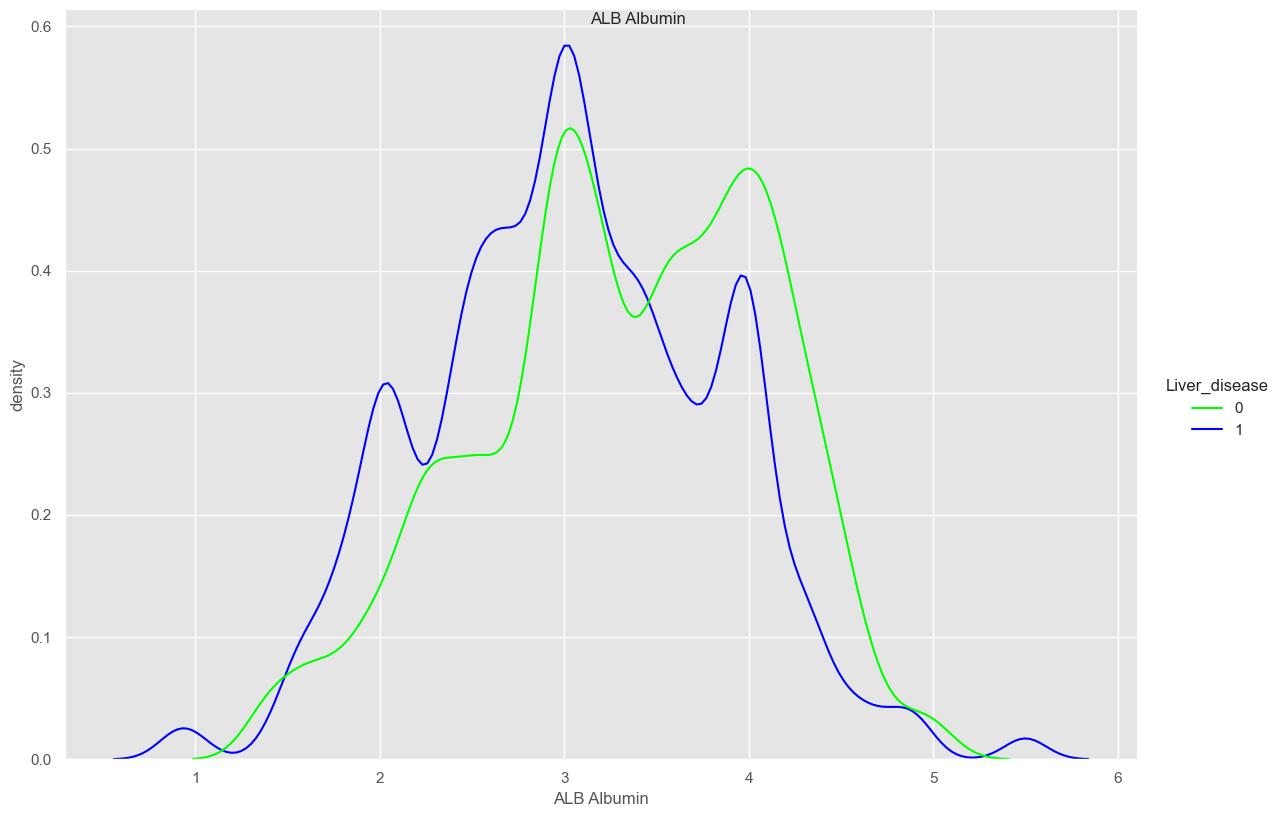

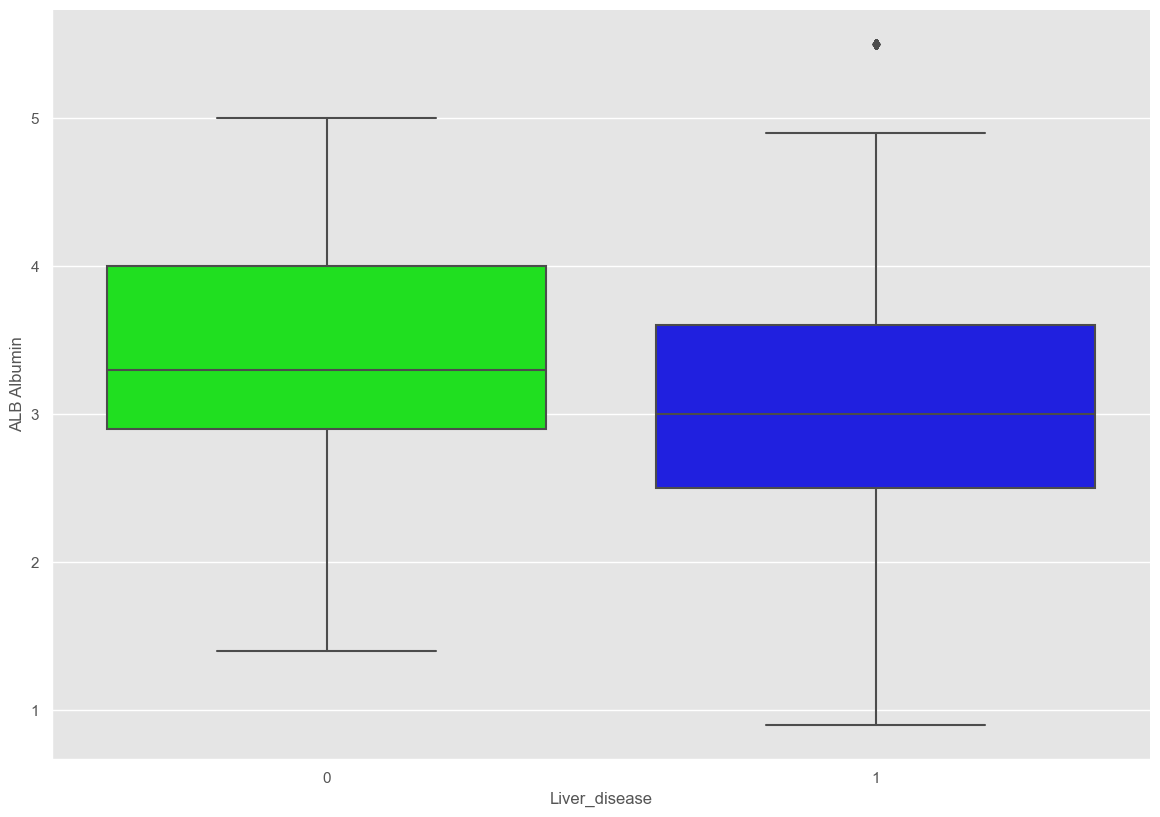

In [71]:
ax = sns.displot(data=train, x="ALB Albumin", kind="kde", hue="Liver_disease",
                 common_norm=False, height=8.27, aspect=11.7/8.27, palette=custom_colors)
ax.set_axis_labels("ALB Albumin", "density")
ax.fig.suptitle("ALB Albumin")
ax = sns.catplot(data=train, x='Liver_disease', y='ALB Albumin', kind='box',
                 height=8.27, aspect=11.7/8.27, palette=custom_colors)

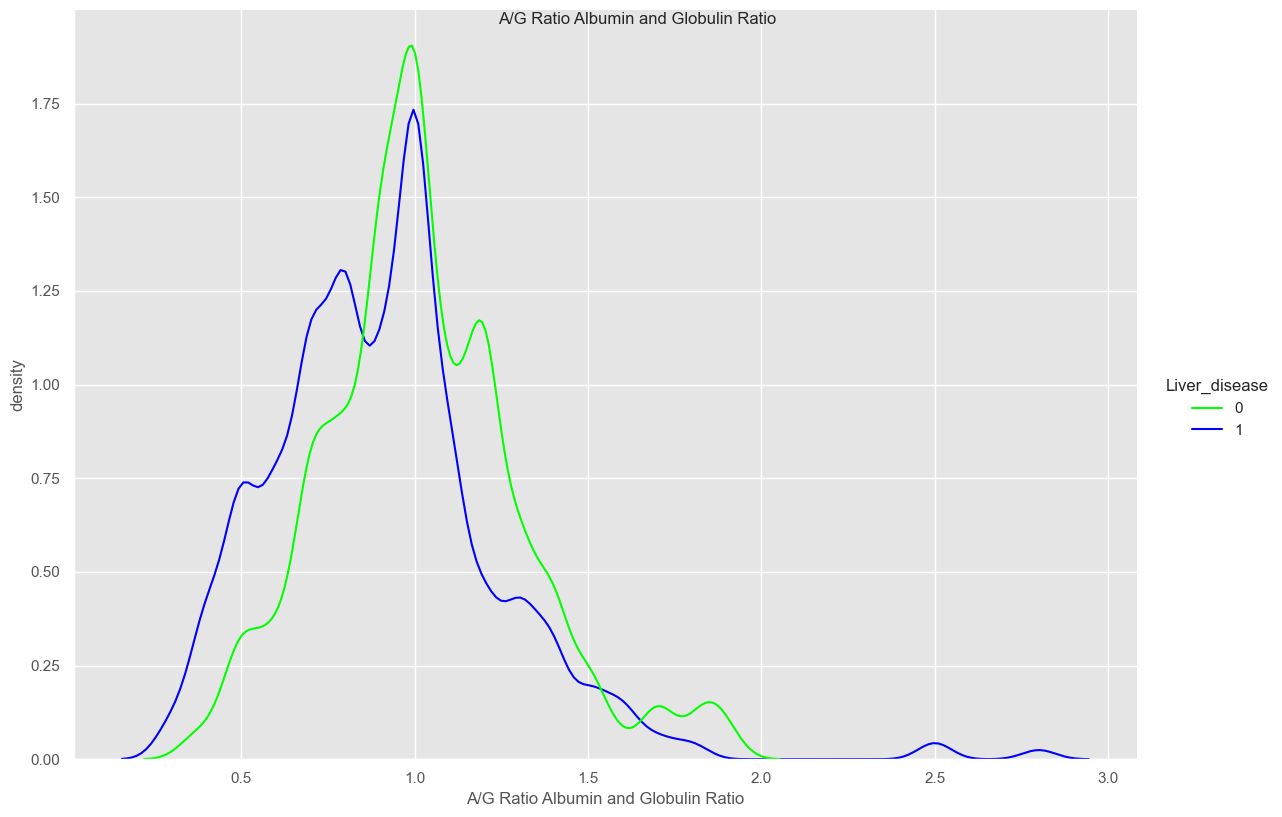

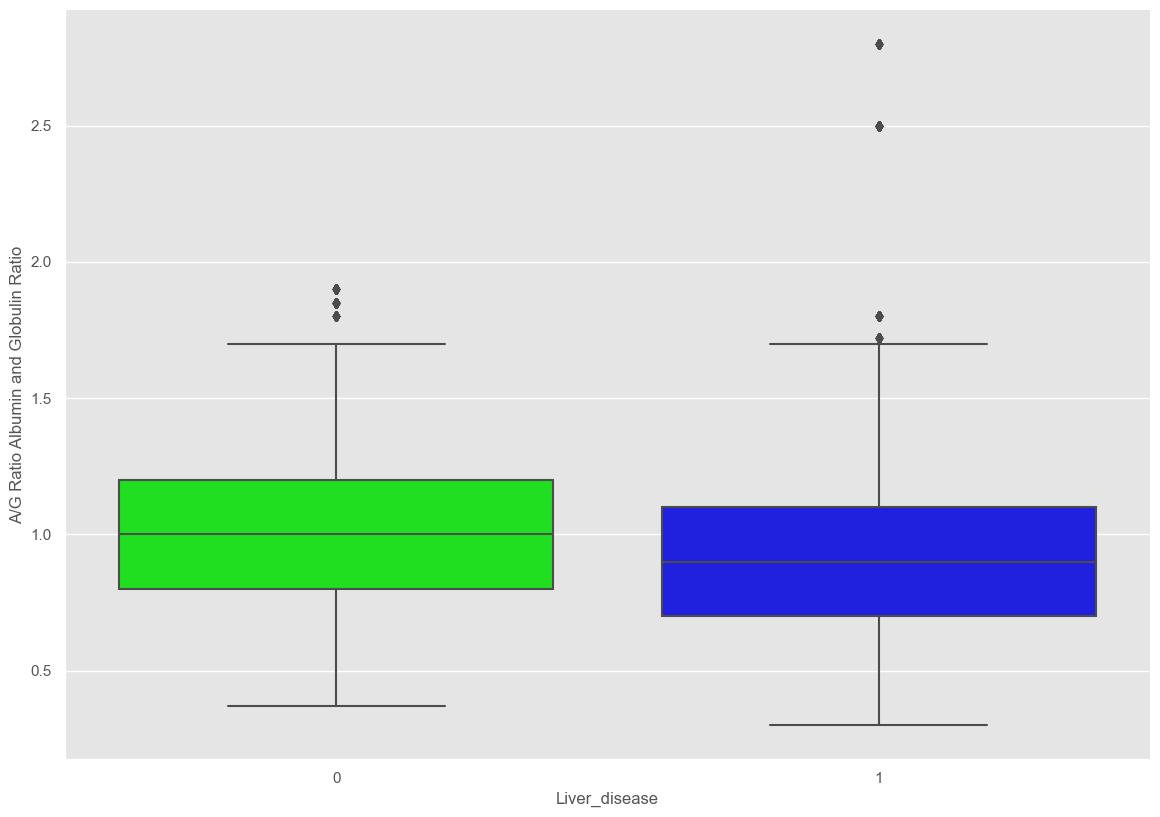

In [72]:
ax = sns.displot(data=train, x="A/G Ratio Albumin and Globulin Ratio", kind="kde", hue="Liver_disease",
                 common_norm=False, height=8.27, aspect=11.7/8.27, palette=custom_colors)
ax.set_axis_labels("A/G Ratio Albumin and Globulin Ratio", "density")
ax.fig.suptitle("A/G Ratio Albumin and Globulin Ratio")
ax = sns.catplot(data=train, x='Liver_disease', y='A/G Ratio Albumin and Globulin Ratio', kind='box',
                 height=8.27, aspect=11.7/8.27, palette=custom_colors)

,Variables,Mean_Values,Status
0,Total Bilirubin,4.326103,Diseased
1,Direct Bilirubin,1.994993,Diseased
2,Alkphos Alkaline Phosphotase,318.034573,Diseased
3,Sgpt Alamine Aminotransferase,100.766630,Diseased
4,Sgot Aspartate Aminotransferase,140.717716,Diseased
5,Total Protiens,6.456751,Diseased
6,ALB Albumin,3.047058,Diseased
7,A/G Ratio Albumin and Globulin Ratio,0.911290,Diseased
8,Total Bilirubin,1.136565,Healthy
9,Direct Bilirubin,0.392353,Healthy


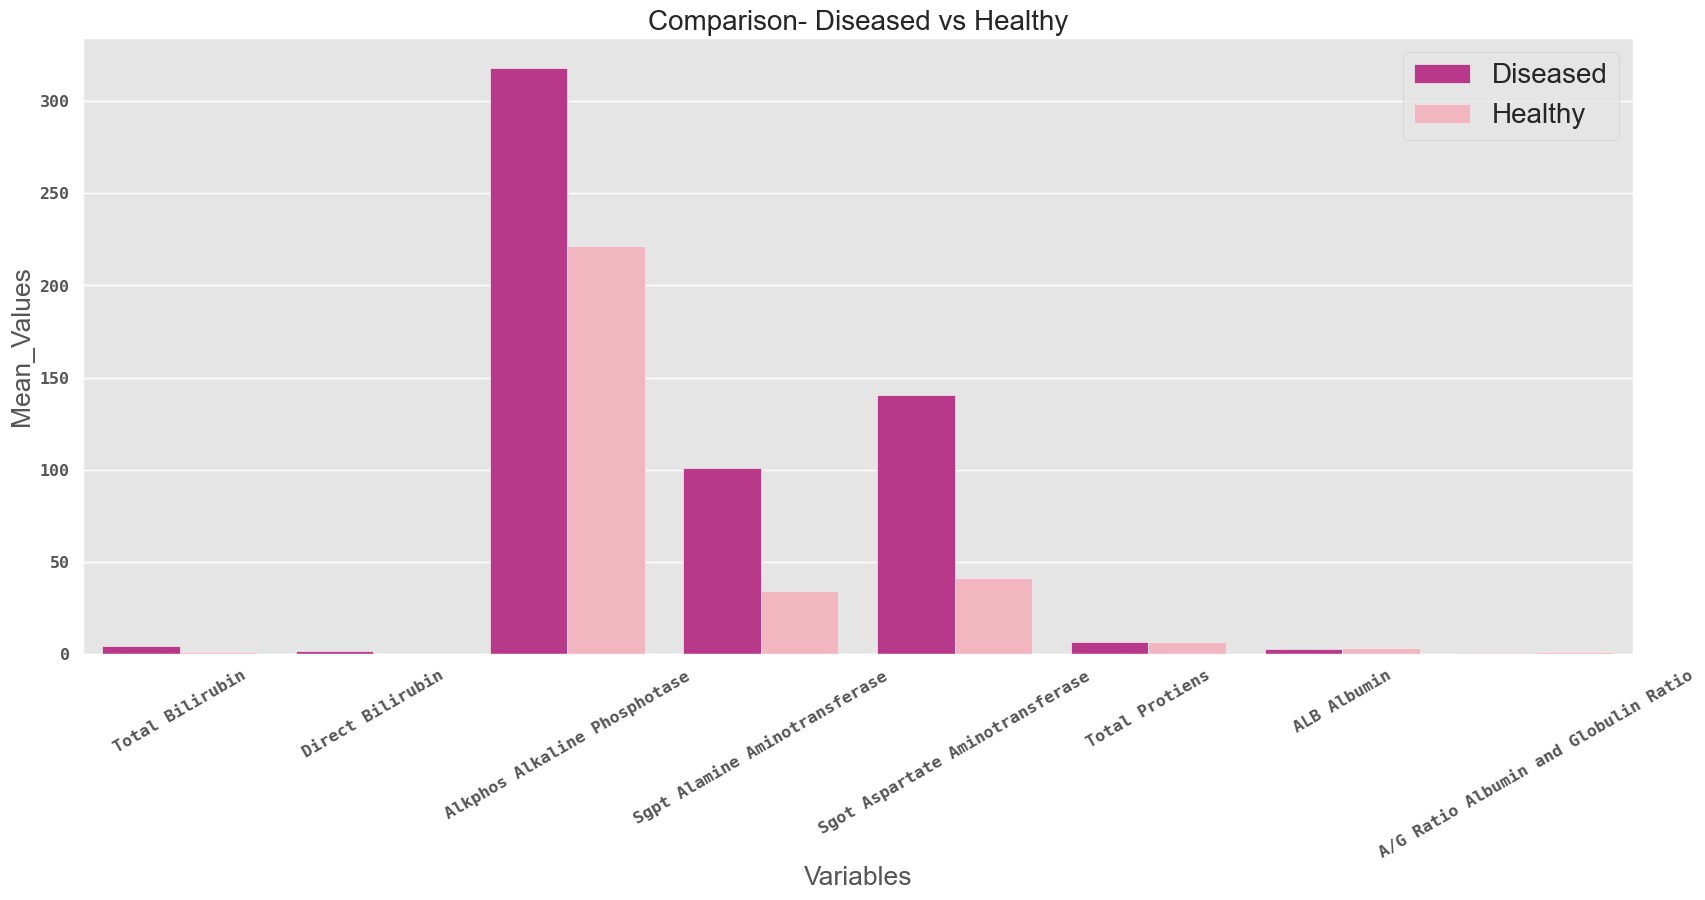

In [73]:
## Visualizing the differences in chemicals in Healthy/Unhealthy people
with_disease = train[train['Liver_disease']==1]

with_disease = with_disease.drop(columns=['Gender of the patient','Age of the patient','Liver_disease'])
names1 = with_disease.columns.unique()
mean_of_features1 = with_disease.mean(axis=0,skipna=True)


without_disease = train[train['Liver_disease']==0]

without_disease = without_disease.drop(columns=['Gender of the patient','Age of the patient','Liver_disease'])
names2 = without_disease.columns.unique()
mean_of_features2 = without_disease.mean(axis=0,skipna=True)

people = []

for x,y in zip(names1,mean_of_features1):
    people.append([x,y,'Diseased'])
for x,y in zip(names2,mean_of_features2):
    people.append([x,y,'Healthy'])
    
new_data = pd.DataFrame(people,columns=['Variables','Mean_Values','Status'])

#ValueError: If using all scalar values, you must pass an index
#https://stackoverflow.com/questions/17839973/construct-pandas-dataframe-from-values-in-variables

fig = plt.figure(figsize=(20,8))
plt.title('Comparison- Diseased vs Healthy',size=20,loc='center')
plt.xticks(rotation = 30, 
           weight='bold', 
           family='monospace',
           size='large')
plt.yticks( weight='bold', 
        family='monospace',
           size='large')

g1 = sns.barplot(x='Variables',y='Mean_Values',hue='Status',data=new_data,palette="RdPu_r")
plt.legend(prop={'size': 20})
plt.xlabel('Variables',size=19)
plt.ylabel('Mean_Values',size=19)



new_data


In [77]:
## Multivariate Analysis 


Text(0.5, 0.98, 'Disease by Gender and Age of the patient')

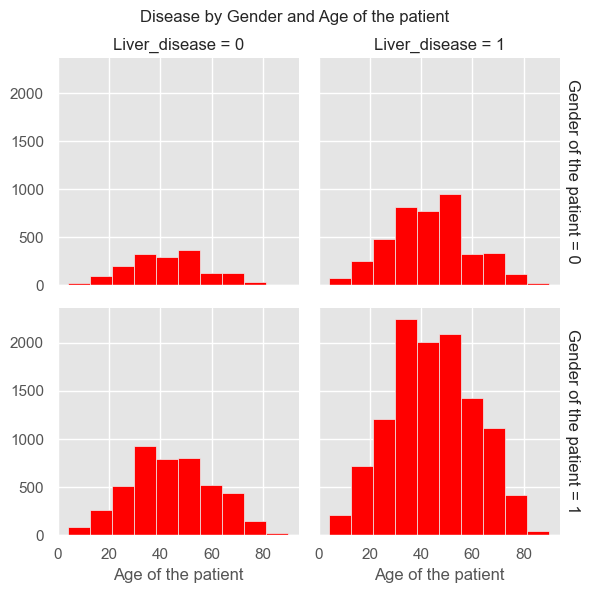

In [78]:

# Plotting Age vs Gender and Liver dicease
g = sns.FacetGrid(train, col="Liver_disease", row="Gender of the patient", margin_titles=True)
g.map(plt.hist, "Age of the patient", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age of the patient')


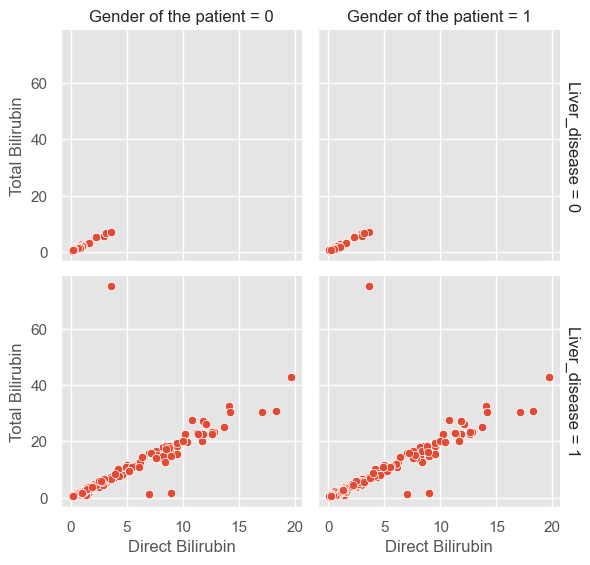

In [79]:

# Plotting Gender(Male/Female) along with Total_Bilirubin and Direct_Bilirubin
g = sns.FacetGrid(train, col="Gender of the patient", row="Liver_disease", margin_titles=True)
g.map(plt.scatter,"Direct Bilirubin", "Total Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)



In [80]:
## Corelation and Heatmaps

In [81]:
## We cannot apply corelation coefficients for Catogorical variables therefore we need to remove the catogical variables and check corelation and heatmap

In [82]:
# Assuming 'Gender of the patient' is the name of the column
X_train_without_gender = X_train.drop(columns=['Gender of the patient'])

# Now calculate the correlation
correlation_matrix = X_train_without_gender.corr()
correlation_matrix

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
Age of the patient,1.000000,0.007648,0.007361,-0.001151,0.001036,0.010131,-0.006876,-0.017934,-0.022789
Total Bilirubin,0.007648,1.000000,0.879826,0.197495,0.207131,0.240529,0.000198,-0.224007,-0.201758
Direct Bilirubin,0.007361,0.879826,1.000000,0.222137,0.225658,0.260510,0.008018,-0.231126,-0.193652
Alkphos Alkaline Phosphotase,-0.001151,0.197495,0.222137,1.000000,0.126906,0.167112,-0.018666,-0.157353,-0.227013
Sgpt Alamine Aminotransferase,0.001036,0.207131,0.225658,0.126906,1.000000,0.780555,-0.046201,-0.032031,-0.005445
Sgot Aspartate Aminotransferase,0.010131,0.240529,0.260510,0.167112,0.780555,1.000000,-0.030471,-0.092181,-0.073979
Total Protiens,-0.006876,0.000198,0.008018,-0.018666,-0.046201,-0.030471,1.000000,0.777007,0.232695
ALB Albumin,-0.017934,-0.224007,-0.231126,-0.157353,-0.032031,-0.092181,0.777007,1.000000,0.683058
A/G Ratio Albumin and Globulin Ratio,-0.022789,-0.201758,-0.193652,-0.227013,-0.005445,-0.073979,0.232695,0.683058,1.000000


In [83]:
## Positive Corelation : One feature increases other feature also increases
## Negetive Corelations : One feature increases other value decreases

In [84]:
## HeatMAp


<Axes: >

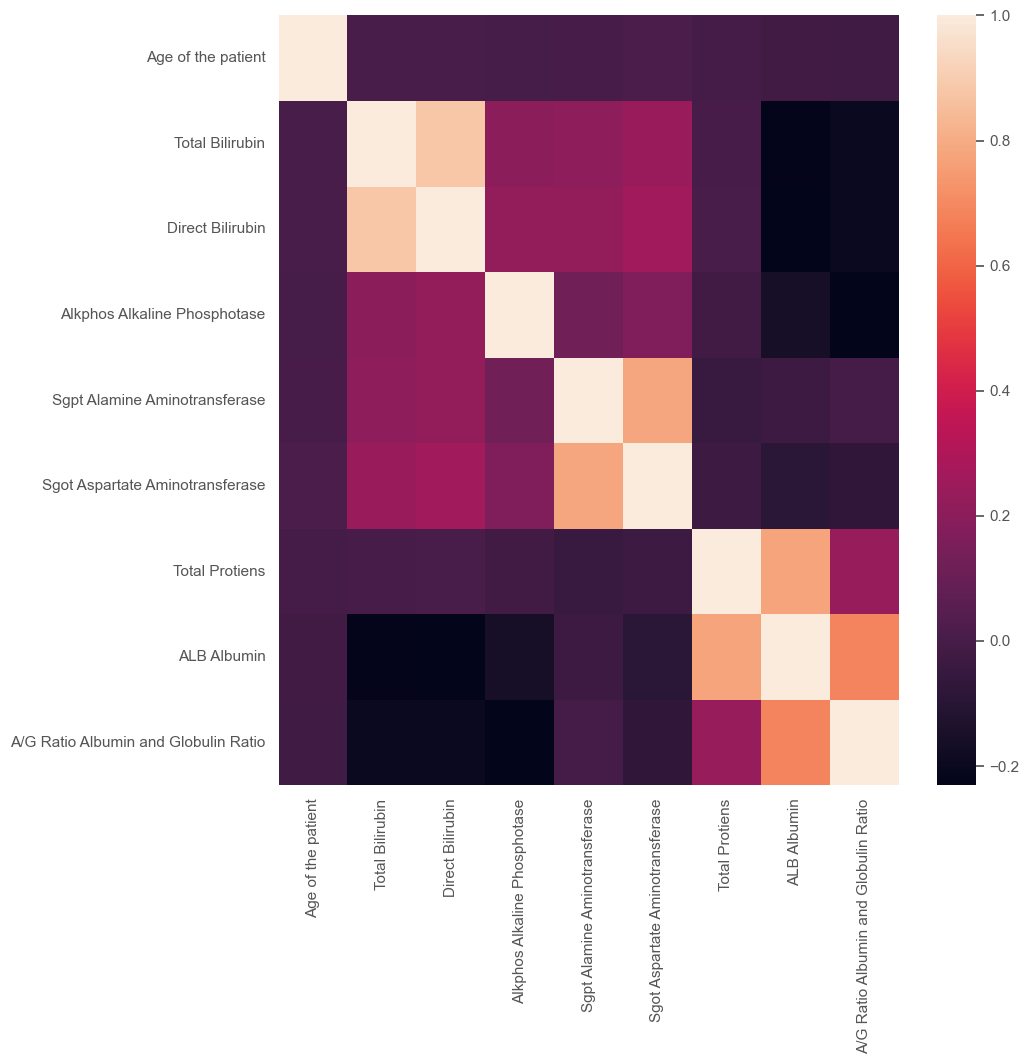

In [85]:
plt.figure(figsize=(10,10))
sns.heatmap( X_train_without_gender.corr())

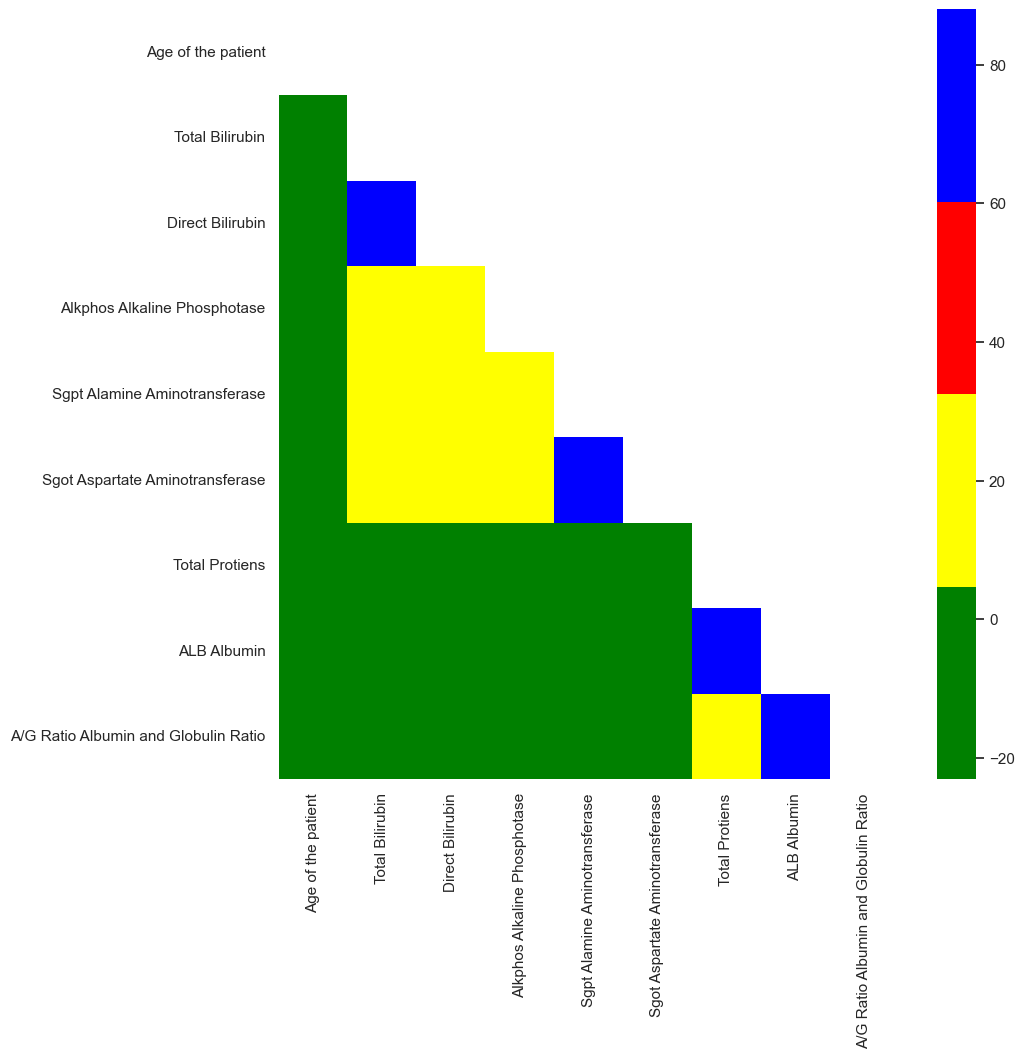

In [86]:


# Remove "Gender of the patient" variable from X_train
X_train_no_gender = X_train.drop(columns=["Gender of the patient"])

mask = np.zeros_like(X_train_no_gender.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
with sns.axes_style("white"):
    ax = sns.heatmap(X_train_no_gender.corr() * 100, mask=mask, fmt=".0f", annot=True, cmap=ListedColormap(["green", "yellow", "red", "blue"]))


In [87]:
#investigating multicolinearity contd.
numeric_vars = X_train.drop(columns=['Gender of the patient'])
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_vars.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_vars.values, i) for i in range(numeric_vars.shape[1])]
vif_data

,Variable,VIF
0,Age of the patient,7.611217
1,Total Bilirubin,5.705971
2,Direct Bilirubin,5.956732
3,Alkphos Alkaline Phosphotase,2.637626
4,Sgpt Alamine Aminotransferase,3.152047
5,Sgot Aspartate Aminotransferase,3.088881
6,Total Protiens,81.210175
7,ALB Albumin,111.068235
8,A/G Ratio Albumin and Globulin Ratio,22.321848


'Age of the patient', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', and 'Liver_disease' have VIF values below 10, suggesting low multicollinearity.

'Total Protiens', 'ALB Albumin', and 'A/G Ratio Albumin and Globulin Ratio' have very high VIF values, indicating high multicollinearity among these variables.Variables with VIF values above 10 are often considered to have problematic levels of multicollinearity

Remedies
Removing Highly Correlated Variables
Regularization Techniques
Principal Component Analysis (PCA)

In [88]:
#### Since Multicolinearity Exist we have to deal with it(BY ONLY CONSIDERING QUANTITATIVW VARIABLES)

In [89]:
import pandas as pd
from scipy.stats import ttest_ind
import statsmodels.api as sm

# Step 1: Exclude "Gender of the patient" column
quantitative_vars = X_train.drop(columns=['Gender of the patient'])



In [90]:
import pandas as pd
from scipy.stats import ttest_ind
import statsmodels.api as sm

# Assuming X_train contains your dataset with columns including 'Gender of the patient'

# Step 1: Exclude "Gender of the patient" column
quantitative_vars = X_train.drop(columns=['Gender of the patient'])

# Step 2: Split data by gender
male_data = X_train[X_train['Gender of the patient'] == 1]
female_data = X_train[X_train['Gender of the patient'] == 0]

# Step 3: Perform ANOVA or T-Test for each variable
for var in quantitative_vars.columns:
    # If there are only two genders, perform t-test
    if len(X_train['Gender of the patient'].unique()) == 2:
        t_stat, p_value = ttest_ind(male_data[var], female_data[var])
        effect_size = abs(male_data[var].mean() - female_data[var].mean()) / \
                      male_data[var].std()
        print("Variable:", var)
        print("T-Test Results:")
        print("T-Statistic:", t_stat)
        print("P-Value:", p_value)
        print("Effect Size (Cohen's d):", effect_size)
        print()  # Add a blank line
    # If there are more than two genders, perform ANOVA
    else:
        anova_results = sm.stats.anova_lm(sm.OLS.from_formula(f'{var} ~ C(Gender_of_the_patient)', data=X_train).fit())
        print("Variable:", var)
        print("ANOVA Results:")
        print(anova_results)
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
        print("Eta-Squared:", eta_squared)
        print()  # Add a blank line


Variable: Age of the patient
T-Test Results:
T-Statistic: 5.248068664758922
P-Value: 1.5514539052817014e-07
Effect Size (Cohen's d): 0.07976057213264537

Variable: Total Bilirubin
T-Test Results:
T-Statistic: 1.9947686952382937
P-Value: 0.04608058529670302
Effect Size (Cohen's d): 0.030002462842601614

Variable: Direct Bilirubin
T-Test Results:
T-Statistic: 1.723063142286778
P-Value: 0.0848913375855445
Effect Size (Cohen's d): 0.026277873645579517

Variable: Alkphos Alkaline Phosphotase
T-Test Results:
T-Statistic: 1.3370663546465205
P-Value: 0.1812149787263467
Effect Size (Cohen's d): 0.020452588278012204

Variable: Sgpt Alamine Aminotransferase
T-Test Results:
T-Statistic: 0.7673271775669387
P-Value: 0.4428953529640528
Effect Size (Cohen's d): 0.011799901661645367

Variable: Sgot Aspartate Aminotransferase
T-Test Results:
T-Statistic: -1.000781696544568
P-Value: 0.31694350734125626
Effect Size (Cohen's d): 0.01623659576682368

Variable: Total Protiens
T-Test Results:
T-Statistic: 0.9

In [91]:
# Drop 'Gender of the patient' column from male_data
male_data = male_data.drop(columns=['Gender of the patient'])

# Drop 'Gender of the patient' column from female_data
female_data = female_data.drop(columns=['Gender of the patient'])


# Calculate correlation matrix for male data
correlation_matrix_male = male_data.corr()

# Calculate correlation matrix for female data
correlation_matrix_female = female_data.corr()

# Print correlation matrix for male data
print("Correlation Matrix for Male Data:")
print(correlation_matrix_male)

# Print correlation matrix for female data
print("\nCorrelation Matrix for Female Data:")
print(correlation_matrix_female)


Correlation Matrix for Male Data:
                                      Age of the patient  Total Bilirubin  \
Age of the patient                              1.000000         0.009464   
Total Bilirubin                                 0.009464         1.000000   
Direct Bilirubin                                0.011054         0.865166   
Alkphos Alkaline Phosphotase                   -0.006259         0.198655   
Sgpt Alamine Aminotransferase                  -0.002620         0.203276   
Sgot Aspartate Aminotransferase                 0.006675         0.240905   
Total Protiens                                 -0.010418        -0.004408   
ALB Albumin                                    -0.022561        -0.226346   
A/G Ratio Albumin and Globulin Ratio           -0.025845        -0.201249   

                                      Direct Bilirubin  \
Age of the patient                            0.011054   
Total Bilirubin                               0.865166   
Direct Bilirubin     

In [92]:
threshold = 0.7  # Define the correlation coefficient threshold

# Iterate through the correlation matrix for male data
print("Highly Correlated Variables in Male Data:")
for col1 in correlation_matrix_male.columns:
    for col2 in correlation_matrix_male.columns:
        if col1 != col2 and abs(correlation_matrix_male.loc[col1, col2]) > threshold:
            print(f"{col1} and {col2}: {correlation_matrix_male.loc[col1, col2]}")

# Iterate through the correlation matrix for female data
print("\nHighly Correlated Variables in Female Data:")
for col1 in correlation_matrix_female.columns:
    for col2 in correlation_matrix_female.columns:
        if col1 != col2 and abs(correlation_matrix_female.loc[col1, col2]) > threshold:
            print(f"{col1} and {col2}: {correlation_matrix_female.loc[col1, col2]}")


Highly Correlated Variables in Male Data:
Total Bilirubin and Direct Bilirubin: 0.865166168875279
Direct Bilirubin and Total Bilirubin: 0.865166168875279
Sgpt Alamine Aminotransferase and Sgot Aspartate Aminotransferase: 0.7905390773381549
Sgot Aspartate Aminotransferase and Sgpt Alamine Aminotransferase: 0.7905390773381549
Total Protiens and ALB Albumin: 0.7773350739039168
ALB Albumin and Total Protiens: 0.7773350739039168

Highly Correlated Variables in Female Data:
Total Bilirubin and Direct Bilirubin: 0.9274404853266766
Direct Bilirubin and Total Bilirubin: 0.9274404853266766
Sgpt Alamine Aminotransferase and Sgot Aspartate Aminotransferase: 0.7661065506791547
Sgot Aspartate Aminotransferase and Sgpt Alamine Aminotransferase: 0.7661065506791547
Total Protiens and ALB Albumin: 0.7762665301437447
ALB Albumin and Total Protiens: 0.7762665301437447


In [93]:
### RELATIONSHIP BETWEEN AGE VS TARGET ;GENDER VS TARGET

In [94]:
from scipy.stats import ttest_ind, mannwhitneyu

# Split the data based on the values of "Liver_disease"
age_with_disease = df[df['Liver_disease'] == 1]['Age of the patient']
age_without_disease = df[df['Liver_disease'] == 0]['Age of the patient']

# Perform independent samples t-test (assuming normality)
t_statistic, p_value_ttest = ttest_ind(age_with_disease, age_without_disease)
print("Independent Samples t-test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value_ttest)

# Perform Mann-Whitney U test (if normality assumption is violated)
u_statistic, p_value_mannwhitneyu = mannwhitneyu(age_with_disease, age_without_disease)
print("\nMann-Whitney U Test:")
print("U-statistic:", u_statistic)
print("p-value:", p_value_mannwhitneyu)


Independent Samples t-test:
t-statistic: 1.1645063253384433
p-value: 0.24422911141519432

Mann-Whitney U Test:
U-statistic: 75513653.5
p-value: 0.21695674811389298


With a p-value of 0.880, we fail to reject the null hypothesis of independence at the typical significance level (e.g., α = 0.05). Therefore, there is no significant association between gender and liver disease in the given data.

In [95]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame named df containing the variables "gender" and "Liver_disease"
# Create a contingency table
contingency_table = pd.crosstab(df['Gender of the patient'], df['Liver_disease'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


Contingency Table:
Liver_disease             0      1
Gender of the patient             
0                      2020   5104
1                      5660  14374

Chi-Square Statistic: 0.022589507271120246
p-value: 0.880529462368887
Degrees of Freedom: 1
Expected Frequencies:
[[ 2014.59312173  5109.40687827]
 [ 5665.40687827 14368.59312173]]


Both tests suggest that there is no statistically significant difference in age between individuals with and without liver disease. Therefore, we fail to reject the null hypothesis, suggesting that age might not be a significant factor associated with liver disease in the given dataset.